In [1]:
from google.colab import files
uploaded = files.upload()

Saving TFGtemplate.xlsx to TFGtemplate.xlsx


In [2]:
import pandas as pd

df = pd.read_excel('TFGtemplate.xlsx')
df.head()
 # Para ver las primeras filas del dataset #

ID                                   Texto Castellano  Longitud palabras  \
0   1  La calidad de vida será considerada como valor...               2756   
1   2  En el campo del Medio Ambiente Coalición Democ...               8471   
2   3  Calidad de vida y medio ambiente. Alianza Popu...               9420   
3   4  Sin duda, la calidad de la vida depende tambié...               4678   
4   5  Desarrollo sostenible: Realizar un gran esfuer...               3756   

               Partido     Año  Ideología  Escaños Obtenidos  \
0      Alianza Popular  1977.0       8.27                 16   
1      Alianza Popular  1979.0       8.27                  0   
2      Alianza Popular  1982.0       8.27                107   
3      Alianza Popular  1986.0       8.27                105   
4  Chunta Aragonesista  2000.0       3.90                  1   

   % Escaños obtenidos  Páginas Totales  Nº caracteres/página  
0             0.045714               43             64.093023  
1             0.000000               87             97.367816  
2             0.305714              176             53.522727  
3             0.300000               64             73.093750  
4             0.002857               24            156.500000

PREPROCESADO DE DATOS

In [3]:
#######Agrupar por Partido y Año y combinar el texto######
df_agrupado = df.groupby(['Partido', 'Año'], as_index=False).agg({
    'Texto Castellano': ' '.join,                      # Une el texto
    'Longitud palabras': 'sum',                        # Suma la longitud
    'Ideología': 'first',                              # Toma la ideología (asumimos que es la misma)
    'Escaños Obtenidos': 'first',                      # Igual para escaños
    '% Escaños obtenidos': 'first',
    'Páginas Totales': 'first',
    'Nº caracteres/página': 'sum'                        # Suma la longitud
})

##### Reiniciar ID si lo necesitas ######
df_agrupado.insert(0, 'ID', range(1, len(df_agrupado) + 1))

##### Mostrar primeras filas ######
print(df_agrupado.head())

   ID          Partido     Año  \
0   1  Alianza Popular  1977.0   
1   2  Alianza Popular  1979.0   
2   3  Alianza Popular  1982.0   
3   4  Alianza Popular  1986.0   
4   5              BNG  1996.0   

                                    Texto Castellano  Longitud palabras  \
0  La calidad de vida será considerada como valor...               2756   
1  En el campo del Medio Ambiente Coalición Democ...               8471   
2  Calidad de vida y medio ambiente. Alianza Popu...               9420   
3  Sin duda, la calidad de la vida depende tambié...               4678   
4  Transferencia a Galicia de todas las competenc...                793   

   Ideología  Escaños Obtenidos  % Escaños obtenidos  Páginas Totales  \
0       8.27                 16             0.045714               43   
1       8.27                  0             0.000000               87   
2       8.27                107             0.305714              176   
3       8.27                105             0.300000

In [4]:
##### Mostrar las primeras 20 filas del DataFrame agrupado ####
print(df_agrupado.head(15))
##### Podemos ver que en el de ciudadanos se ha hecho correctamente #####

    ID              Partido     Año  \
0    1      Alianza Popular  1977.0   
1    2      Alianza Popular  1979.0   
2    3      Alianza Popular  1982.0   
3    4      Alianza Popular  1986.0   
4    5                  BNG  1996.0   
5    6                  BNG  2004.0   
6    7                  BNG  2008.0   
7    8                  BNG  2011.0   
8    9                  BNG  2023.0   
9   10                  CDC  2016.0   
10  11                  CIU  2011.0   
11  12                  CUP  2019.2   
12  13  Chunta Aragonesista  2000.0   
13  14  Chunta Aragonesista  2004.0   
14  15           Ciudadanos  2015.0   

                                     Texto Castellano  Longitud palabras  \
0   La calidad de vida será considerada como valor...               2756   
1   En el campo del Medio Ambiente Coalición Democ...               8471   
2   Calidad de vida y medio ambiente. Alianza Popu...               9420   
3   Sin duda, la calidad de la vida depende tambié...               467

In [5]:
#### Procedemos ahora a listar las stopwords ####
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = stopwords.words('spanish')
extra = ['informacion', 'él']
stop_words.extend(extra)
stop_words = set(stop_words)

print(sorted(stop_words)[:100])

['a', 'al', 'algo', 'algunas', 'algunos', 'ante', 'antes', 'como', 'con', 'contra', 'cual', 'cuando', 'de', 'del', 'desde', 'donde', 'durante', 'e', 'el', 'ella', 'ellas', 'ellos', 'en', 'entre', 'era', 'erais', 'eran', 'eras', 'eres', 'es', 'esa', 'esas', 'ese', 'eso', 'esos', 'esta', 'estaba', 'estabais', 'estaban', 'estabas', 'estad', 'estada', 'estadas', 'estado', 'estados', 'estamos', 'estando', 'estar', 'estaremos', 'estará', 'estarán', 'estarás', 'estaré', 'estaréis', 'estaría', 'estaríais', 'estaríamos', 'estarían', 'estarías', 'estas', 'este', 'estemos', 'esto', 'estos', 'estoy', 'estuve', 'estuviera', 'estuvierais', 'estuvieran', 'estuvieras', 'estuvieron', 'estuviese', 'estuvieseis', 'estuviesen', 'estuvieses', 'estuvimos', 'estuviste', 'estuvisteis', 'estuviéramos', 'estuviésemos', 'estuvo', 'está', 'estábamos', 'estáis', 'están', 'estás', 'esté', 'estéis', 'estén', 'estés', 'fue', 'fuera', 'fuerais', 'fueran', 'fueras', 'fueron', 'fuese', 'fueseis', 'fuesen', 'fueses']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
def eliminar_stopwords(texto):
    palabras = texto.split()  # Dividir el texto en palabras
    palabras_filtradas = [palabra for palabra in palabras if palabra.lower() not in stop_words]
    return ' '.join(palabras_filtradas)

In [7]:
df_agrupado['Texto sin stopwords'] = df_agrupado['Texto Castellano'].apply(eliminar_stopwords)

In [8]:
### compruebo que todo está bien ###
print(df_agrupado.head(20))

    ID              Partido     Año  \
0    1      Alianza Popular  1977.0   
1    2      Alianza Popular  1979.0   
2    3      Alianza Popular  1982.0   
3    4      Alianza Popular  1986.0   
4    5                  BNG  1996.0   
5    6                  BNG  2004.0   
6    7                  BNG  2008.0   
7    8                  BNG  2011.0   
8    9                  BNG  2023.0   
9   10                  CDC  2016.0   
10  11                  CIU  2011.0   
11  12                  CUP  2019.2   
12  13  Chunta Aragonesista  2000.0   
13  14  Chunta Aragonesista  2004.0   
14  15           Ciudadanos  2015.0   
15  16           Ciudadanos  2016.0   
16  17           Ciudadanos  2019.1   
17  18           Ciudadanos  2019.2   
18  19    Coalición Canaria  2008.0   
19  20    Coalición Canaria  2011.0   

                                     Texto Castellano  Longitud palabras  \
0   La calidad de vida será considerada como valor...               2756   
1   En el campo del Medio Am

In [9]:
#### Procedemos ahora a eliminar signos de puntuación ####
import re

def eliminar_puntuacion(texto):
    # 1) Cada signo de puntuación (todo lo que no sea letra/dígito/espacio)
    texto = re.sub(r'[^\w\s]', ' ', texto)
    # 2) Colapsa múltiples espacios en uno solo
    texto = re.sub(r'\s+', ' ', texto)
    return texto.strip()

df_agrupado['Texto limpio'] = (
    df_agrupado['Texto sin stopwords']
      .apply(eliminar_puntuacion)
)


In [10]:
### compruebo que todo está bien ###
print(df_agrupado.head(4))

   ID          Partido     Año  \
0   1  Alianza Popular  1977.0   
1   2  Alianza Popular  1979.0   
2   3  Alianza Popular  1982.0   
3   4  Alianza Popular  1986.0   

                                    Texto Castellano  Longitud palabras  \
0  La calidad de vida será considerada como valor...               2756   
1  En el campo del Medio Ambiente Coalición Democ...               8471   
2  Calidad de vida y medio ambiente. Alianza Popu...               9420   
3  Sin duda, la calidad de la vida depende tambié...               4678   

   Ideología  Escaños Obtenidos  % Escaños obtenidos  Páginas Totales  \
0       8.27                 16             0.045714               43   
1       8.27                  0             0.000000               87   
2       8.27                107             0.305714              176   
3       8.27                105             0.300000               64   

   Nº caracteres/página                                Texto sin stopwords  \
0        

In [11]:
#### Convertimos ahora todo a minúsculas ####
def convertir_a_minusculas(texto):
    return texto.lower()

In [12]:
df_agrupado['Texto limpio'] = df_agrupado['Texto limpio'].apply(convertir_a_minusculas)

In [13]:
### compruebo que todo está bien ###
print(df_agrupado.head(4))

   ID          Partido     Año  \
0   1  Alianza Popular  1977.0   
1   2  Alianza Popular  1979.0   
2   3  Alianza Popular  1982.0   
3   4  Alianza Popular  1986.0   

                                    Texto Castellano  Longitud palabras  \
0  La calidad de vida será considerada como valor...               2756   
1  En el campo del Medio Ambiente Coalición Democ...               8471   
2  Calidad de vida y medio ambiente. Alianza Popu...               9420   
3  Sin duda, la calidad de la vida depende tambié...               4678   

   Ideología  Escaños Obtenidos  % Escaños obtenidos  Páginas Totales  \
0       8.27                 16             0.045714               43   
1       8.27                  0             0.000000               87   
2       8.27                107             0.305714              176   
3       8.27                105             0.300000               64   

   Nº caracteres/página                                Texto sin stopwords  \
0        

In [14]:
#### Procedemos a eliminar espacios extras ####
def eliminar_espacios_extra(texto):
    return ' '.join(texto.split())

In [15]:
df_agrupado['Texto limpio'] = df_agrupado['Texto limpio'].apply(eliminar_espacios_extra)

In [16]:
#### Procedemos a eliminar números ####
def eliminar_numeros(texto):
    # devuelve el texto sin ningún dígito
    return ''.join([i for i in texto if not i.isdigit()])

In [17]:
# Aplicamos la función a toda la columna
df_agrupado['Texto limpio'] = df_agrupado['Texto limpio'].apply(eliminar_numeros)

In [18]:
### compruebo que todo está bien ###
print(df_agrupado.head(4))

   ID          Partido     Año  \
0   1  Alianza Popular  1977.0   
1   2  Alianza Popular  1979.0   
2   3  Alianza Popular  1982.0   
3   4  Alianza Popular  1986.0   

                                    Texto Castellano  Longitud palabras  \
0  La calidad de vida será considerada como valor...               2756   
1  En el campo del Medio Ambiente Coalición Democ...               8471   
2  Calidad de vida y medio ambiente. Alianza Popu...               9420   
3  Sin duda, la calidad de la vida depende tambié...               4678   

   Ideología  Escaños Obtenidos  % Escaños obtenidos  Páginas Totales  \
0       8.27                 16             0.045714               43   
1       8.27                  0             0.000000               87   
2       8.27                107             0.305714              176   
3       8.27                105             0.300000               64   

   Nº caracteres/página                                Texto sin stopwords  \
0        

In [19]:
!pip install unidecode
from unidecode import unidecode

# Función para eliminar acentos
def eliminar_acentos(texto):
    return unidecode(texto)

# Aplicar la eliminación de acentos a los textos
df_agrupado['Texto sin acentos'] = df_agrupado['Texto limpio'].apply(eliminar_acentos)

# Verificar que todo está bien
print(df_agrupado.head(15))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 4.3 MB/s eta 0:00:00
    ID              Partido     Año  \
0    1      Alianza Popular  1977.0   
1    2      Alianza Popular  1979.0   
2    3      Alianza Popular  1982.0   
3    4      Alianza Popular  1986.0   
4    5                  BNG  1996.0   
5    6                  BNG  2004.0   
6    7                  BNG  2008.0   
7    8                  BNG  2011.0   
8    9                  BNG  2023.0   
9   10                  CDC  2016.0   
10  11                  CIU  2011.0   
11  12                  CUP  2019.2   
12  13  Chunta Aragonesista  2000.0   
13  14  Chunta Aragonesista  2004.0   
14  15           Ciudadanos  2015.0   

                                     Texto Castellano  Longitud palabras  \
0   La calidad de vida será considerada como valor...               2756   
1   En el campo del Medio Ambiente Coalición Democ...               8471   
2   Calidad de vida y medio ambiente. Alianza Popu...              

In [20]:
!pip install -U spacy
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 106.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [21]:
import spacy
nlp = spacy.load('es_core_news_sm')

In [22]:
#### Procedemos ahora a la lematización del texto ####

def lematizar_texto(texto):
    doc = nlp(texto)
    lemas = []
    for token in doc:
        # 1) Filtrar stopwords, puntuación, pronombres y tokens muy cortos
        if token.is_stop or token.is_punct or token.pos_ == 'PRON' or len(token.text) <= 1:
            continue

        # 2) Si es verbo, mantenemos la forma original
        if token.pos_ == 'VERB':
            lemas.append(token.text)
        # 3) Si es sustantivo o adjetivo, usamos el lema (singular, masculino)
        elif token.pos_ in {'NOUN', 'ADJ'}:
            lemas.append(token.lemma_)
        # 4) Para el resto (ADV, etc.), también usamos el lema
        else:
            lemas.append(token.lemma_)
    return ' '.join(lemas)

# Aplicar sobre la columna limpia y sin acentos
df_agrupado['Texto lematizado'] = (
    df_agrupado['Texto sin acentos']
      .apply(lematizar_texto)
)

# Verificar ejemplos concretos
print(df_agrupado.loc[:5, ['Texto sin acentos','Texto lematizado']])

                                   Texto sin acentos  \
0  calidad vida considerada valor fundamental pla...   
1  campo medio ambiente coalicion democratica pro...   
2  calidad vida medio ambiente alianza popular co...   
3  duda calidad vida depende servicios que sector...   
4  transferencia galicia todas competencias mater...   
5  proteccion integral regeneracion ambiental cos...   

                                    Texto lematizado  
0  calidad vida considerado valor fundamental pla...  
1  campo ambiente coalicion democratico propone e...  
2  calidad vida ambiente alianza popular convicci...  
3  duda calidad vida depende servicio sector clav...  
4  transferencia galicia competencia materio ambi...  
5  proteccion integral regeneracion ambiental cos...  


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(


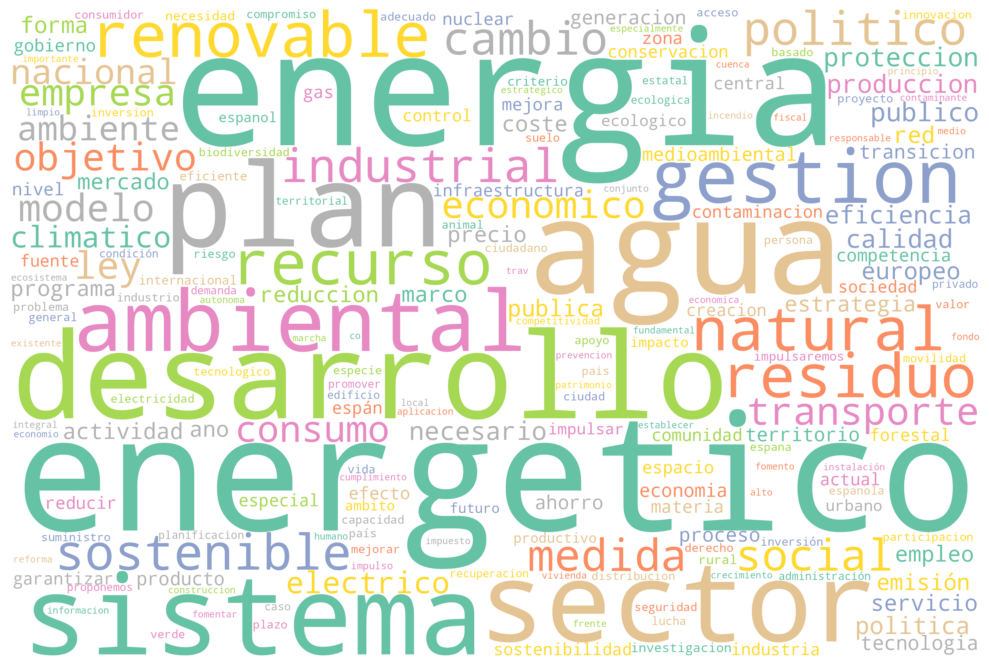

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS

# 1) Crear un set de stopwords que incluya 'él' y 'el'
mis_stopwords = STOPWORDS.union({'él','el'})

# 2) Unir todo el texto lematizado
texto_lemas = ' '.join(df_agrupado['Texto lematizado'])

# Convertir mis_stopwords a lista
mis_stopwords_list = list(mis_stopwords)

# Preparar la lista de documentos
docs = df_agrupado['Texto lematizado'].dropna().tolist()

# 3) Contamos solo unigramas con CountVectorizer
cv_uni = CountVectorizer(
    ngram_range=(1, 1),          # unigramas únicamente
    stop_words=mis_stopwords_list,
    min_df=1
)
X_uni = cv_uni.fit_transform(docs)

# 4) Extraer tokens y sus recuentos
terms = cv_uni.get_feature_names_out()      # array de palabras
counts = X_uni.sum(axis=0).A1               # array de frecuencias

# 5) Formar el diccionario {palabra: recuento}
freq_dict = dict(zip(terms, counts))

# 6) Crear WordCloud a partir de esas frecuencias
wordcloud = WordCloud(
    width=3000,
    height=2000,
    background_color='white',
    colormap='Set2',
    prefer_horizontal=1.0,
).generate_from_frequencies(freq_dict)

# 7) Dibujar Word Cloud
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

ANÁLISIS BIGRAMAS Y TRIGRAMAS

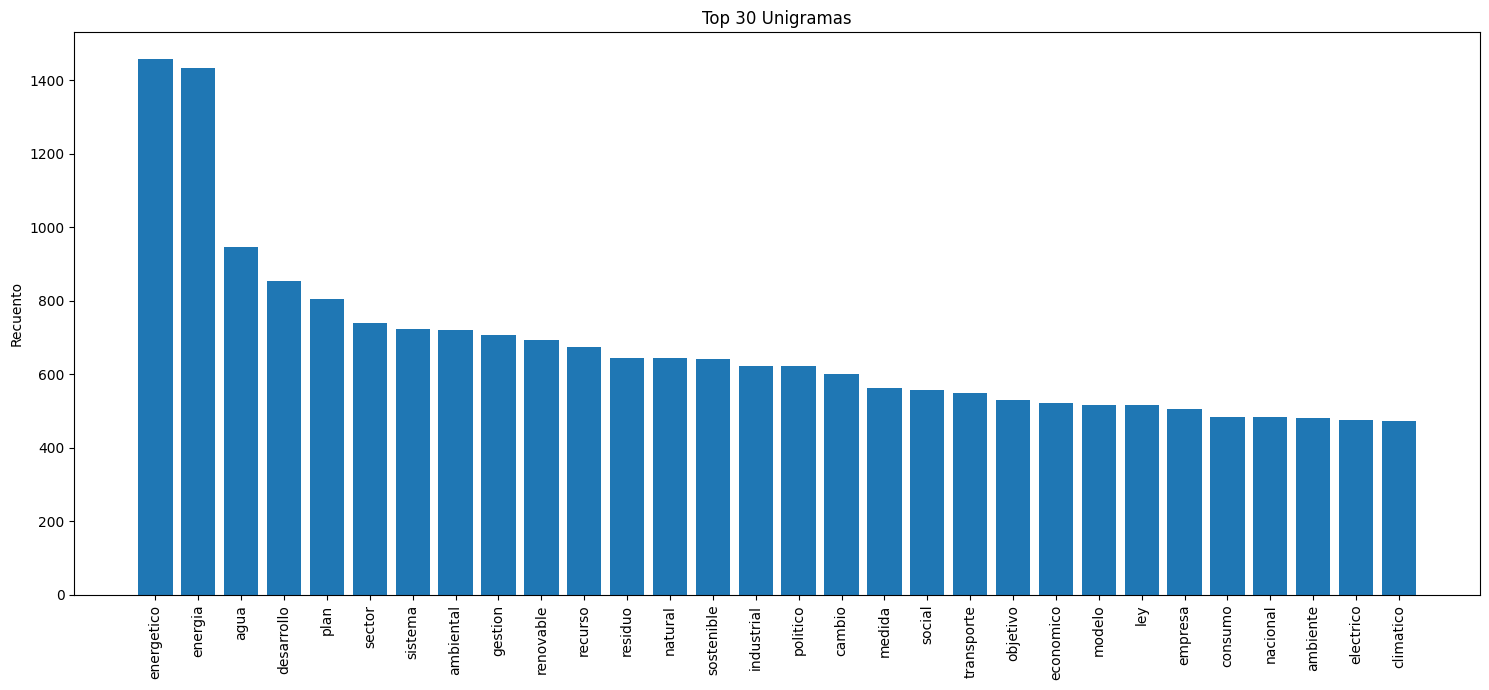

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from unidecode import unidecode
import unicodedata


# 1) Construye la lista de documentos (texto lematizado) sin NaN
dft = df_agrupado['Texto lematizado'].dropna().tolist()

# 2) Convierte el set de stopwords a lista
mis_stopwords_list = list(mis_stopwords)

# 3) Inicializa CountVectorizer para unigramas, bigramas y trigramas
cv = CountVectorizer(
    ngram_range=(1, 3),
    stop_words=mis_stopwords_list,  # ahora es una lista, no un set
    min_df=1
)

# 4) Ajusta y transforma
X_counts = cv.fit_transform(dft)

# 5) Extrae términos y recuentos
terms = cv.get_feature_names_out()
counts = X_counts.sum(axis=0).A1

# 6) Crea DataFrame y ordena
df_counts = pd.DataFrame({
    'N-Grama': terms,
    'Recuento': counts
}).sort_values('Recuento', ascending=False)

# 7) Top 30 y gráfica
df_top30 = df_counts.head(30)
plt.figure(figsize=(15, 7))
plt.bar(df_top30['N-Grama'], df_top30['Recuento'])
plt.xticks(rotation=90)
plt.ylabel('Recuento')
plt.title('Top 30 Unigramas')
plt.tight_layout()
plt.show()

In [25]:
# Mostrar los 30 unigramas más frecuentes junto a su recuento
print(df_top30)

           N-Grama  Recuento
71765   energetico      1458
73488      energia      1433
7474          agua       948
55613   desarrollo       854
146223        plan       804
179989      sector       739
183610     sistema       724
10824    ambiental       721
97274      gestion       707
172562   renovable       695
167780     recurso       674
174722     residuo       644
131971     natural       644
187164  sostenible       642
108073  industrial       623
149506    politico       622
26235       cambio       602
124206      medida       563
184920      social       558
196391  transporte       550
136352    objetivo       531
63743    economico       522
128568      modelo       518
117721         ley       516
70320      empresa       506
42665      consumo       485
131210    nacional       483
11816     ambiente       482
67697    electrico       475
33349    climatico       472


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(


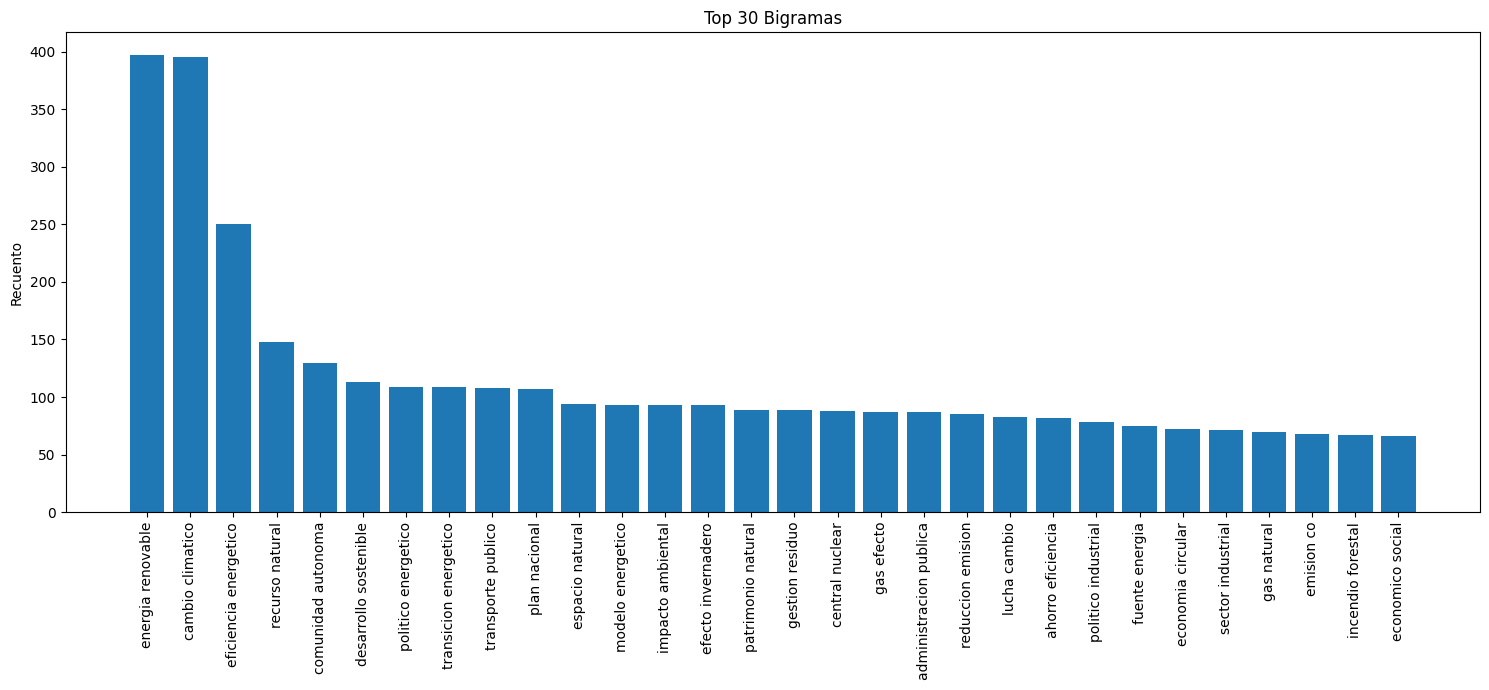

In [26]:
# 1) Construye la lista de documentos (texto lematizado) sin NaN
docs = df_agrupado['Texto lematizado'].dropna().tolist()

# 2) Convierte el set de stopwords a lista
mis_stopwords_list = list(mis_stopwords)

# 3) Configura CountVectorizer para **solo bigramas**, eliminando acentos justo antes:
cv_bi = CountVectorizer(
    ngram_range=(2, 2),            # solo bigramas
    stop_words=mis_stopwords_list, # lista de stopwords personalizada
    min_df=1,                      # mínimo de documentos donde debe aparecer
    preprocessor=lambda doc: unidecode(doc)  # elimina acentos antes de tokenizar
)

# 4) Ajusta y transforma el corpus
X_bi = cv_bi.fit_transform(docs)

# 5) Extrae bigramas y recuentos totales
bigrams = cv_bi.get_feature_names_out()
counts_bi = X_bi.sum(axis=0).A1

# 6) Crea DataFrame ordenado por recuento
df_bigrams = pd.DataFrame({
    'Bigrama': bigrams,
    'Recuento': counts_bi
}).sort_values('Recuento', ascending=False)

# 7) Selecciona los 30 más frecuentes
df_top30_bi = df_bigrams.head(30)

# 8) Graficar
plt.figure(figsize=(15, 7))
plt.bar(df_top30_bi['Bigrama'], df_top30_bi['Recuento'])
plt.xticks(rotation=90)
plt.ylabel('Recuento')
plt.title('Top 30 Bigramas')
plt.tight_layout()
plt.show()


In [27]:
# Mostrar el top 30 con sus recuentos
print(df_top30_bi)

                      Bigrama  Recuento
30479       energia renovable       397
10876        cambio climatico       395
27171   eficiencia energetico       250
69167         recurso natural       148
15852      comunidad autonoma       130
23212   desarrollo sostenible       113
61528     politico energetico       109
80401   transicion energetico       109
80695      transporte publico       108
60343           plan nacional       107
31519         espacio natural        94
52969       modelo energetico        93
42120       impacto ambiental        93
27000      efecto invernadero        93
58786      patrimonio natural        89
40229         gestion residuo        89
12509         central nuclear        88
39349              gas efecto        87
2065   administracion publica        87
69481       reduccion emision        85
49665            lucha cambio        83
3601        ahorro eficiencia        82
61556     politico industrial        78
38270          fuente energia        75


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(


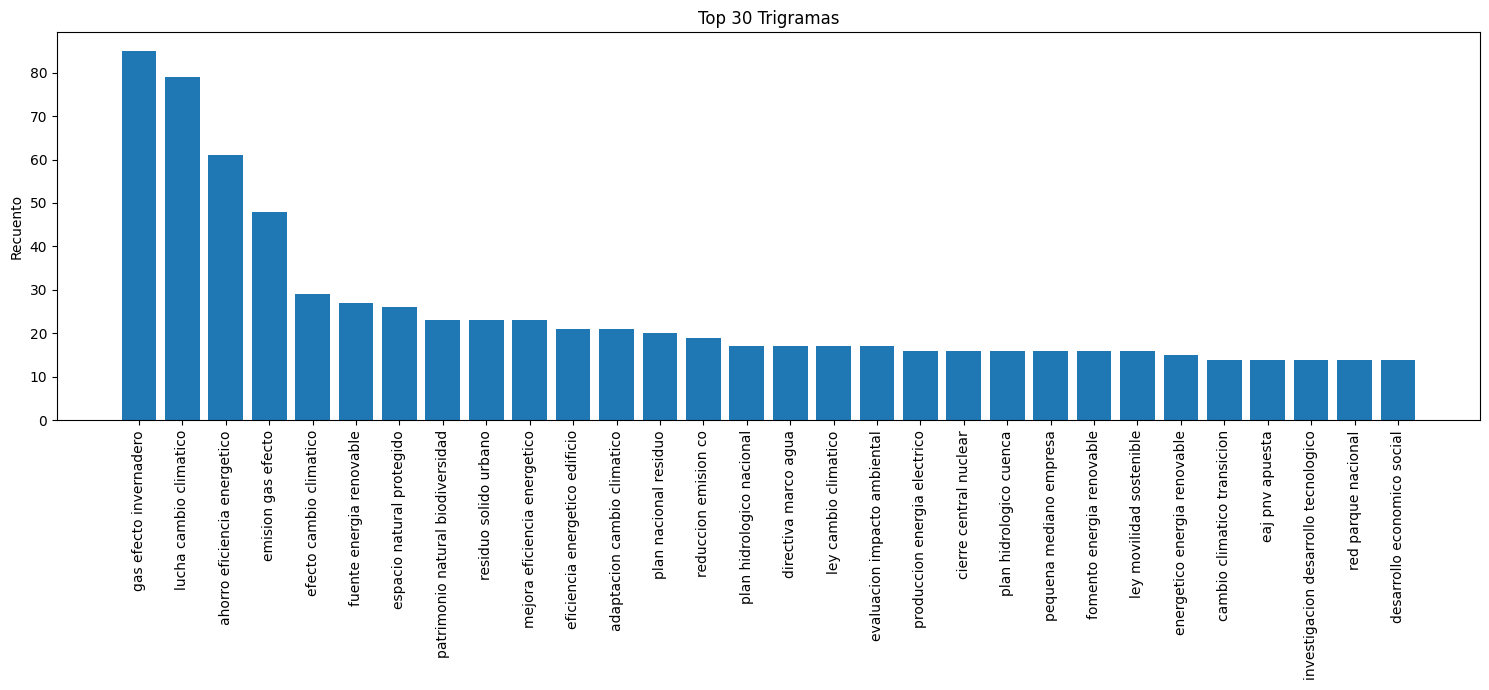

In [28]:
# 1) Construye la lista de documentos (texto lematizado) sin NaN
docs = df_agrupado['Texto lematizado'].dropna().tolist()

# 2) Convierte el set de stopwords a lista
mis_stopwords_list = list(mis_stopwords)

# 3) Configura CountVectorizer para **solo trigramas**, eliminando acentos antes:
cv_tri = CountVectorizer(
    ngram_range=(3, 3),            # sólo trigramas
    stop_words=mis_stopwords_list, # lista de stopwords personalizada
    min_df=1,                      # mínimo de documentos donde debe aparecer
    preprocessor=lambda doc: unidecode(doc)  # elimina acentos antes de tokenizar
)

# 4) Ajusta y transforma el corpus
X_tri = cv_tri.fit_transform(docs)

# 5) Extrae trigramas y sus recuentos totales
trigrams = cv_tri.get_feature_names_out()
counts_tri = X_tri.sum(axis=0).A1

# 6) Crea DataFrame ordenado por recuento
df_trigrams = pd.DataFrame({
    'Trigrama': trigrams,
    'Recuento': counts_tri
}).sort_values('Recuento', ascending=False)

# 7) Selecciona los 30 más frecuentes
df_top30_tri = df_trigrams.head(30)

# 8) Graficar
plt.figure(figsize=(15, 7))
plt.bar(df_top30_tri['Trigrama'], df_top30_tri['Recuento'])
plt.xticks(rotation=90)
plt.ylabel('Recuento')
plt.title('Top 30 Trigramas')
plt.tight_layout()
plt.show()


In [29]:
# Mostrar el top 30 con sus recuentos
print(df_top30_tri)

                                   Trigrama  Recuento
50478                gas efecto invernadero        85
63550                lucha cambio climatico        79
4643           ahorro eficiencia energetico        61
36535                    emision gas efecto        48
34326               efecto cambio climatico        29
49143              fuente energia renovable        27
41049             espacio natural protegido        26
75519      patrimonio natural biodiversidad        23
92972                 residuo solido urbano        23
66408          mejora eficiencia energetico        23
34679        eficiencia energetico edificio        21
2050            adaptacion cambio climatico        21
77558                 plan nacional residuo        20
89740                  reduccion emision co        19
77451             plan hidrologico nacional        17
31090                  directiva marco agua        17
62135                  ley cambio climatico        17
44493          evaluacion im

ANÁLISIS BIGRAMAS Y TRIGRAMAS : COMPARATIVA PP-PSOE

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'd', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'm', 'mustn', 're', 's', 'shan', 'shouldn', 't', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(


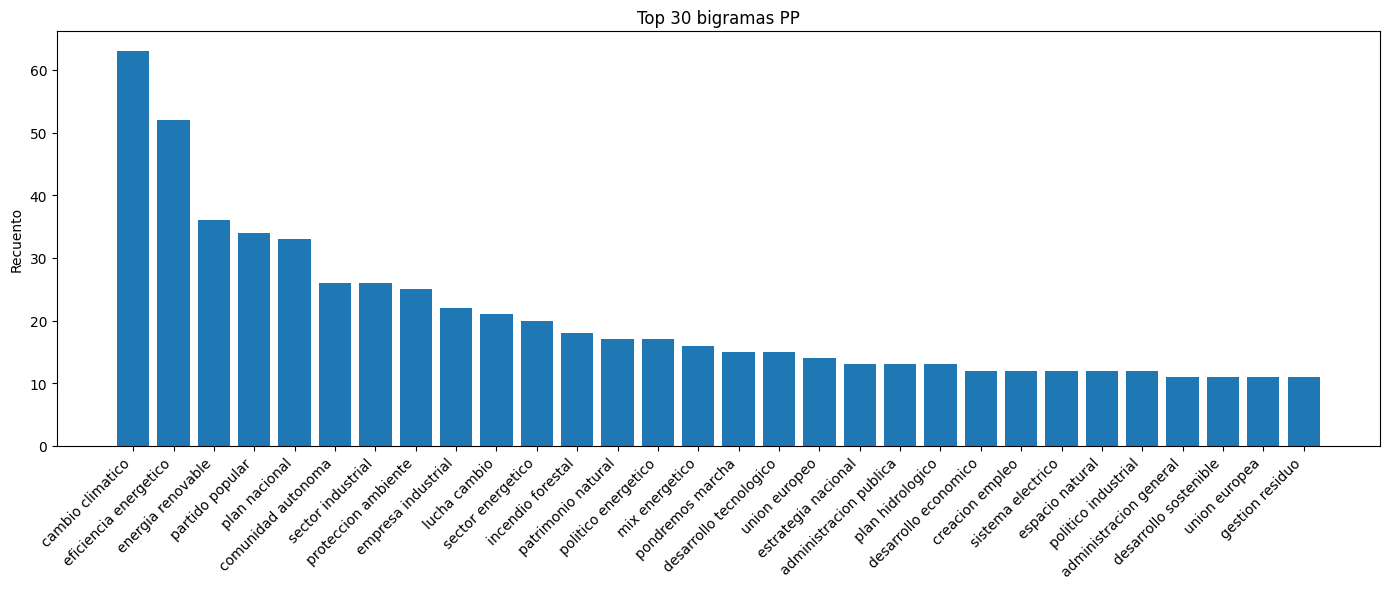

In [30]:
# 1) Filtrar solo los programas del PP
df_pp = df_agrupado[df_agrupado['Partido'] == 'PP']

# 2) Sacar la columna lematizada y eliminar posibles NaN
texts_pp = df_pp['Texto lematizado'].dropna().tolist()

# 3) Convertir el set de stopwords a lista
mis_stopwords_list = list(mis_stopwords)

# 4) Configurar CountVectorizer para solo bigramas sin acentos
vec_pp = CountVectorizer(
    ngram_range=(2, 2),                      # solo bigramas
    stop_words=mis_stopwords_list,           # lista de stopwords personalizada
    preprocessor=lambda doc: unidecode(doc), # elimina acentos antes de tokenizar
    token_pattern=r'(?u)\b\w+\b'             # conserva solo tokens alfanuméricos
)

# 5) Ajustar y transformar el corpus
X_pp = vec_pp.fit_transform(texts_pp)

# 6) Sumar recuentos de cada bigrama
bigrams_pp = vec_pp.get_feature_names_out()
counts_pp = X_pp.sum(axis=0).A1

# 7) Crear DataFrame ordenado y quedarnos con top 30
df_bi_pp = (
    pd.DataFrame({'Bigrama': bigrams_pp, 'Recuento': counts_pp})
      .sort_values('Recuento', ascending=False)
      .head(30)
)

# 8) Graficar con etiquetas legibles
plt.figure(figsize=(14, 6))
plt.bar(df_bi_pp['Bigrama'], df_bi_pp['Recuento'])
plt.xticks(rotation=45, ha='right')          # rotar 45° y alinear a la derecha
plt.subplots_adjust(bottom=0.25)              # dejar más espacio abajo
plt.ylabel('Recuento')
plt.title('Top 30 bigramas PP')
plt.tight_layout()
plt.show()

In [31]:
# 1) Mostrar todo el top 30 con sus recuentos
print(df_bi_pp)

                      Bigrama  Recuento
1728         cambio climatico        63
4090    eficiencia energetico        52
4730        energia renovable        36
9335          partido popular        34
9592            plan nacional        33
2440       comunidad autonoma        26
11671       sector industrial        26
10545     proteccion ambiente        25
4444       empresa industrial        22
7901             lucha cambio        21
11656       sector energetico        20
6859        incendio forestal        18
9353       patrimonio natural        17
9750      politico energetico        17
8494           mix energetico        16
9791         pondremos marcha        15
3540   desarrollo tecnologico        15
12724           union europeo        14
5255      estrategia nacional        13
361    administracion publica        13
9582         plan hidrologico        13
3494     desarrollo economico        12
3016          creacion empleo        12
11882       sistema electrico        12


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'd', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'm', 'mustn', 're', 's', 'shan', 'shouldn', 't', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(


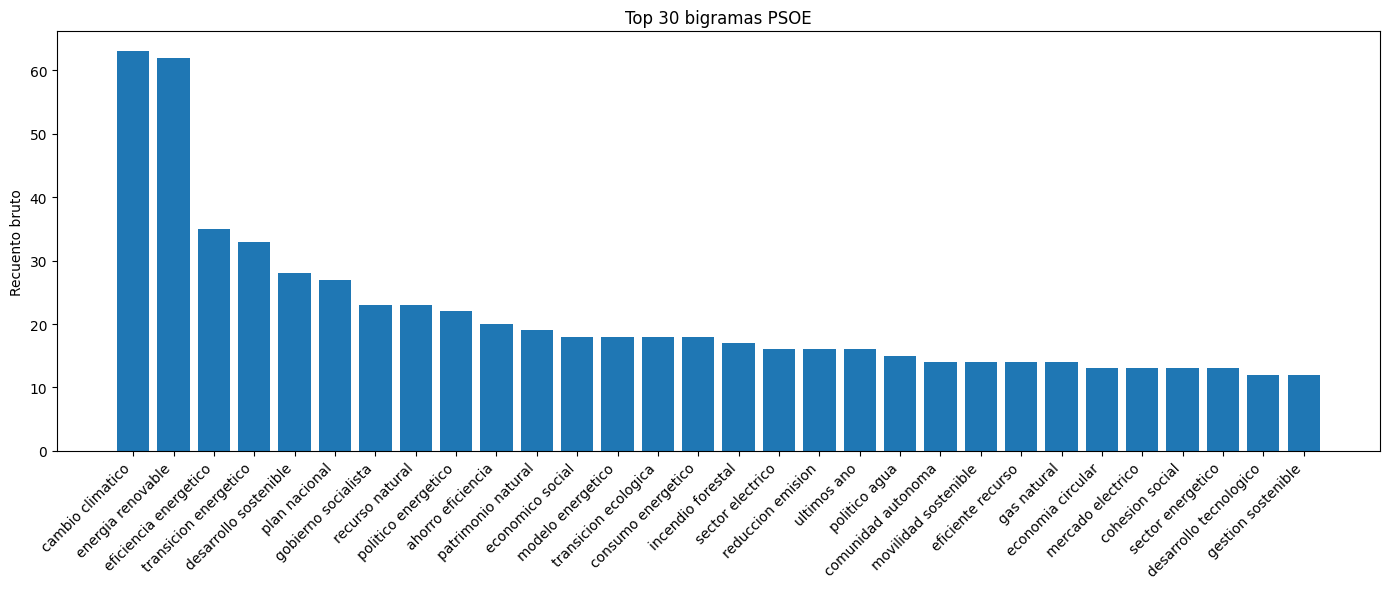

In [32]:
# 1) Filtrar solo los programas del PSOE
df_psoe = df_agrupado[df_agrupado['Partido'] == 'PSOE']

# 2) Sacar la columna lematizada y eliminar posibles NaN
texts_psoe = df_psoe['Texto lematizado'].dropna().tolist()

# 3) Convertir el set de stopwords a lista (si lo usas)
mis_stopwords_list = list(mis_stopwords)

# 4) Configurar CountVectorizer para solo bigramas sin acentos
vec_psoe = CountVectorizer(
    ngram_range=(2, 2),                      # solo bigramas
    stop_words=mis_stopwords_list,           # lista de stopwords personalizada
    preprocessor=lambda doc: unidecode(doc), # elimina acentos antes de tokenizar
    token_pattern=r'(?u)\b\w+\b'             # conserva solo tokens alfanuméricos
)

# 5) Ajustar y transformar el corpus
X_psoe = vec_psoe.fit_transform(texts_psoe)

# 6) Sumar recuentos de cada bigrama
bigrams_psoe = vec_psoe.get_feature_names_out()
counts_psoe = X_psoe.sum(axis=0).A1

# 7) Crear DataFrame ordenado y quedarnos con top 30
df_bi_psoe = (
    pd.DataFrame({'Bigrama': bigrams_psoe, 'Recuento': counts_psoe})
      .sort_values('Recuento', ascending=False)
      .head(30)
)

# 8) Graficar con etiquetas legibles
plt.figure(figsize=(14, 6))
plt.bar(df_bi_psoe['Bigrama'], df_bi_psoe['Recuento'])
plt.xticks(rotation=45, ha='right')          # rotar 45° y alinear a la derecha
plt.subplots_adjust(bottom=0.25)              # dejar más espacio abajo
plt.ylabel('Recuento bruto')
plt.title('Top 30 bigramas PSOE')
plt.tight_layout()
plt.show()


In [33]:
# 1) Mostrar todo el top 30 con sus recuentos
print(df_bi_psoe)

                      Bigrama  Recuento
2101         cambio climatico        63
5744        energia renovable        62
5086    eficiencia energetico        35
15018   transicion energetico        33
4366    desarrollo sostenible        28
11128           plan nacional        27
7574      gobierno socialista        23
12777         recurso natural        23
11365     politico energetico        22
730         ahorro eficiencia        20
10825      patrimonio natural        19
4959         economico social        18
9799        modelo energetico        18
15016    transicion ecologica        18
3297       consumo energetico        18
8059        incendio forestal        17
13763        sector electrico        16
12850       reduccion emision        16
15182             ultimos ano        16
11339           politico agua        15
2927       comunidad autonoma        14
9898     movilidad sostenible        14
5120        eficiente recurso        14
7341              gas natural        14


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'd', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'm', 'mustn', 're', 's', 'shan', 'shouldn', 't', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(


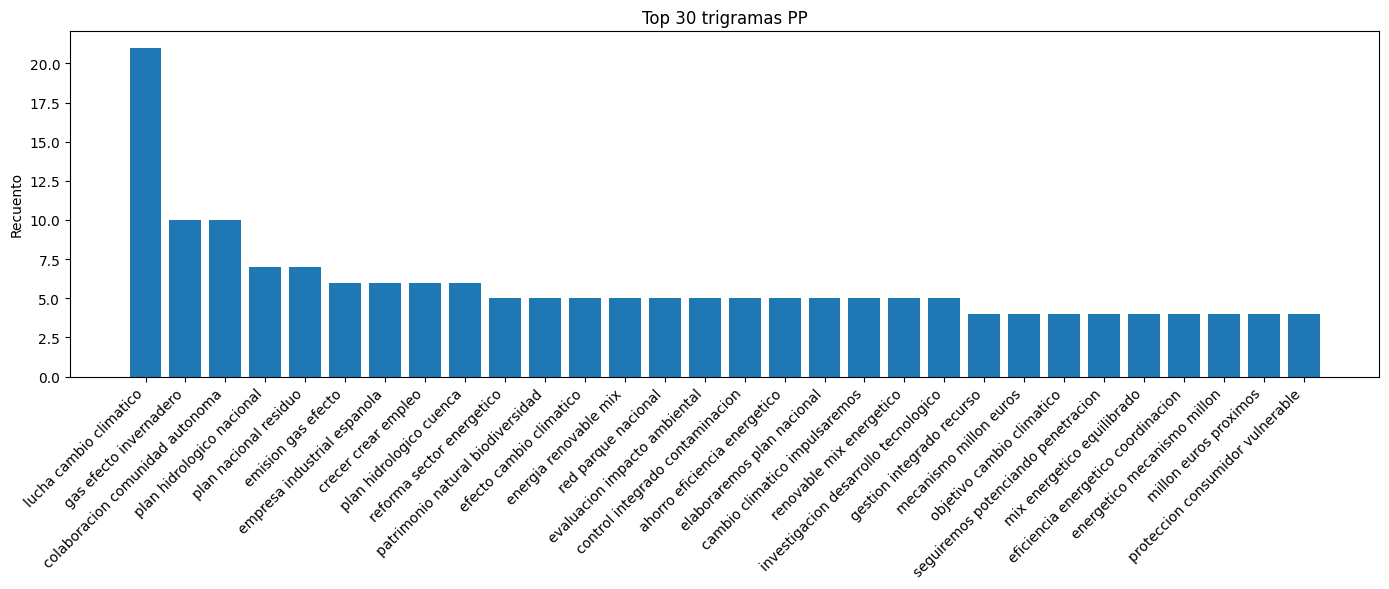

In [34]:
# 1) Filtrar solo los programas del PP
df_pp = df_agrupado[df_agrupado['Partido'] == 'PP']

# 2) Sacar la columna lematizada y eliminar posibles NaN
texts_pp = df_pp['Texto lematizado'].dropna().tolist()

# 3) Convertir el set de stopwords a lista (si lo usas)
mis_stopwords_list = list(mis_stopwords)

# 4) Configurar CountVectorizer para solo trigramas sin acentos
vec_pp_tri = CountVectorizer(
    ngram_range=(3, 3),                     # solo trigramas
    stop_words=mis_stopwords_list,          # lista de stopwords personalizada
    preprocessor=lambda doc: unidecode(doc),# elimina acentos antes de tokenizar
    token_pattern=r'(?u)\b\w+\b'            # conserva solo tokens alfanuméricos
)

# 5) Ajustar y transformar el corpus
X_pp_tri = vec_pp_tri.fit_transform(texts_pp)

# 6) Sumar recuentos de cada trigrama
trigrams_pp     = vec_pp_tri.get_feature_names_out()
counts_pp_tri   = X_pp_tri.sum(axis=0).A1

# 7) Crear DataFrame ordenado
df_tri_pp = pd.DataFrame({
    'Trigrama': trigrams_pp,
    'Recuento': counts_pp_tri
}).sort_values('Recuento', ascending=False)

# 7b) Eliminar cualquier trigrama que contenga 'trav'
df_tri_pp = df_tri_pp[~df_tri_pp['Trigrama'].str.contains(r'\btrav\b')]

# 8) Quedarnos con el top 30
df_tri_pp = df_tri_pp.head(30)

# 9) Graficar con etiquetas legibles
plt.figure(figsize=(14, 6))
plt.bar(df_tri_pp['Trigrama'], df_tri_pp['Recuento'])
plt.xticks(rotation=45, ha='right')         # rotar 45° y alinear a la derecha
plt.subplots_adjust(bottom=0.25)             # dejar más espacio abajo
plt.ylabel('Recuento')
plt.title('Top 30 trigramas PP')
plt.tight_layout()
plt.show()

In [35]:
# 1) Mostrar todo el top 30 de trigramas del PP con sus recuentos
print(df_tri_pp)

                                   Trigrama  Recuento
9108                 lucha cambio climatico        21
7189                 gas efecto invernadero        10
2477        colaboracion comunidad autonoma        10
11100             plan hidrologico nacional         7
11127                 plan nacional residuo         7
5036                     emision gas efecto         6
5152            empresa industrial espanola         6
3506                    crecer crear empleo         6
11099               plan hidrologico cuenca         6
12932             reforma sector energetico         5
10836      patrimonio natural biodiversidad         5
4649                efecto cambio climatico         5
5537                  energia renovable mix         5
12794                   red parque nacional         5
6303           evaluacion impacto ambiental         5
3252        control integrado contaminacion         5
702            ahorro eficiencia energetico         5
4869             elaboraremo

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'd', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'm', 'mustn', 're', 's', 'shan', 'shouldn', 't', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(


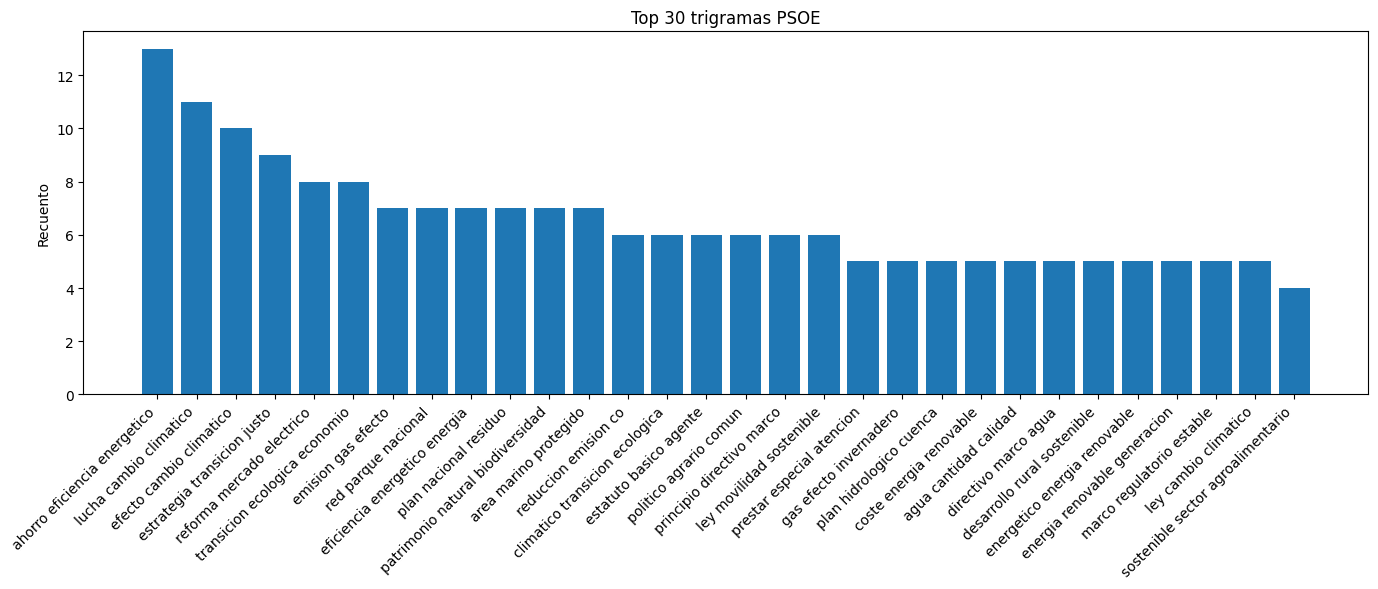

In [36]:
# 1) Filtrar solo los programas del PSOE
df_psoe = df_agrupado[df_agrupado['Partido'] == 'PSOE']

# 2) Sacar la columna lematizada y eliminar posibles NaN
texts_psoe = df_psoe['Texto lematizado'].dropna().tolist()

# 3) Convertir el set de stopwords a lista (si lo usas)
mis_stopwords_list = list(mis_stopwords)

# 4) Configurar CountVectorizer para solo trigramas sin acentos
vec_psoe_tri = CountVectorizer(
    ngram_range=(3, 3),                     # solo trigramas
    stop_words=mis_stopwords_list,          # lista de stopwords personalizada
    preprocessor=lambda doc: unidecode(doc),# elimina acentos antes de tokenizar
    token_pattern=r'(?u)\b\w+\b'            # conserva solo tokens alfanuméricos
)

# 5) Ajustar y transformar el corpus
X_psoe_tri = vec_psoe_tri.fit_transform(texts_psoe)

# 6) Sumar recuentos de cada trigrama
trigrams_psoe = vec_psoe_tri.get_feature_names_out()
counts_psoe_tri = X_psoe_tri.sum(axis=0).A1

# 7) Crear DataFrame ordenado y quedarnos con top 30
df_tri_psoe = (
    pd.DataFrame({'Trigrama': trigrams_psoe, 'Recuento': counts_psoe_tri})
      .sort_values('Recuento', ascending=False)
      .head(30)
)

# 8) Graficar con etiquetas legibles
plt.figure(figsize=(14, 6))
plt.bar(df_tri_psoe['Trigrama'], df_tri_psoe['Recuento'])
plt.xticks(rotation=45, ha='right')         # rotar 45° y alinear a la derecha
plt.subplots_adjust(bottom=0.25)             # dejar más espacio abajo
plt.ylabel('Recuento')
plt.title('Top 30 trigramas PSOE')
plt.tight_layout()
plt.show()

In [37]:
# 1) Mostrar todo el top 30 de trigramas del PSOE con sus recuentos
print(df_tri_psoe)

                                Trigrama  Recuento
822         ahorro eficiencia energetico        13
10419             lucha cambio climatico        11
5708             efecto cambio climatico        10
7261         estrategia transicion justo         9
14744          reforma mercado electrico         8
17124      transicion ecologica economio         8
6058                  emision gas efecto         7
14600                red parque nacional         7
5762       eficiencia energetico energia         7
12621              plan nacional residuo         7
12266   patrimonio natural biodiversidad         7
1612               area marino protegido         7
14638               reduccion emision co         6
2939      climatico transicion ecologica         6
7205              estatuto basico agente         6
12870             politico agrario comun         6
13367          principio directivo marco         6
10191           ley movilidad sostenible         6
13258          prestar especial

ANÁLISIS BIGRAMAS Y TRIGRAMAS: COMPARATIVA TEMPORAL

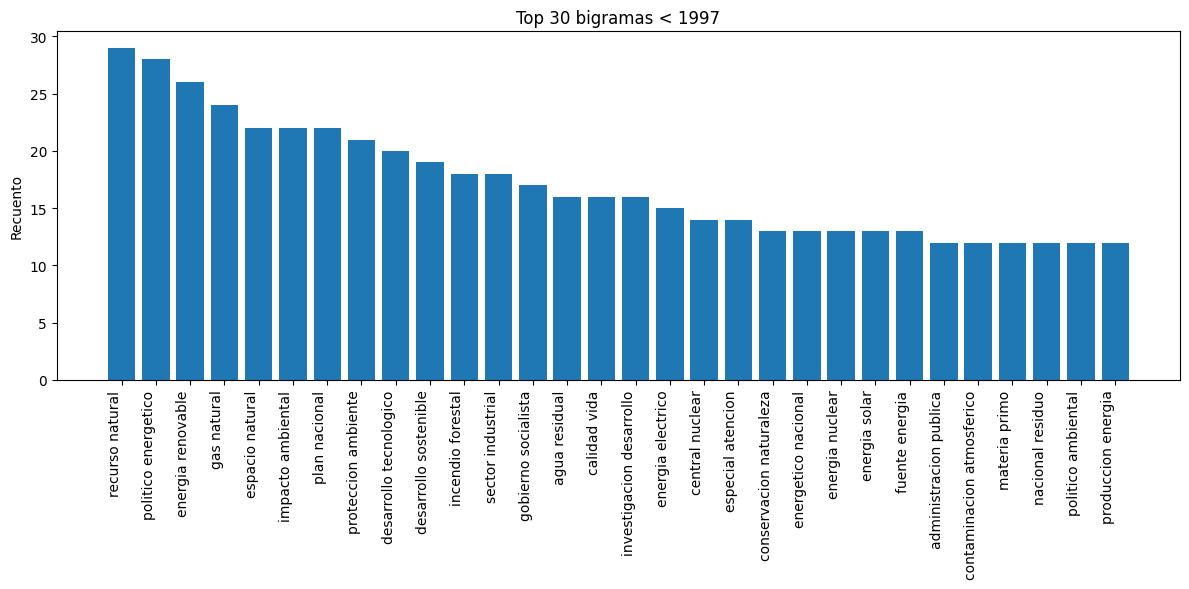

In [38]:
# 1) Filtrar todos los programas con Año < 1997
df_pre97 = df_agrupado[df_agrupado['Año'] < 1997]

# 2) Extraer la columna lematizada y eliminar posibles NaN
texts_pre97 = df_pre97['Texto lematizado'].dropna().tolist()

# 3) Vectorizador de recuentos para bigramas SIN ACENTOS
vec_pre97 = CountVectorizer(
    ngram_range=(2, 2),
    token_pattern=r'(?u)\b\w+\b',
    preprocessor=lambda doc: unidecode(doc)  # elimina acentos antes de tokenizar
)

# 4) Ajustar y transformar el corpus
X_pre97 = vec_pre97.fit_transform(texts_pre97)

# 5) Sumar recuentos de cada bigrama
bigrams_pre97 = vec_pre97.get_feature_names_out()
counts_pre97 = X_pre97.sum(axis=0).A1
freq_dict_pre97 = dict(zip(bigrams_pre97, counts_pre97))

# 6) Ordenar y quedarnos con los 30 bigramas más frecuentes
top30_pre97 = sorted(freq_dict_pre97.items(), key=lambda x: x[1], reverse=True)[:30]
df_bi_pre97 = pd.DataFrame(top30_pre97, columns=['Bigrama','Recuento'])

# 7) Graficar
plt.figure(figsize=(12,6))
plt.bar(df_bi_pre97['Bigrama'], df_bi_pre97['Recuento'])
plt.xticks(rotation=90, ha='right')
plt.subplots_adjust(bottom=0.25)
plt.ylabel('Recuento')
plt.title('Top 30 bigramas < 1997')
plt.tight_layout()
plt.show()

In [39]:
# 1) Mostrar todo el top 30 de bigramas de programas con Año < 1997 con sus recuentos
print(df_bi_pre97)

                      Bigrama  Recuento
0             recurso natural        29
1         politico energetico        28
2           energia renovable        26
3                 gas natural        24
4             espacio natural        22
5           impacto ambiental        22
6               plan nacional        22
7         proteccion ambiente        21
8      desarrollo tecnologico        20
9       desarrollo sostenible        19
10          incendio forestal        18
11          sector industrial        18
12        gobierno socialista        17
13              agua residual        16
14               calidad vida        16
15   investigacion desarrollo        16
16          energia electrico        15
17            central nuclear        14
18          especial atencion        14
19    conservacion naturaleza        13
20        energetico nacional        13
21            energia nuclear        13
22              energia solar        13
23             fuente energia        13


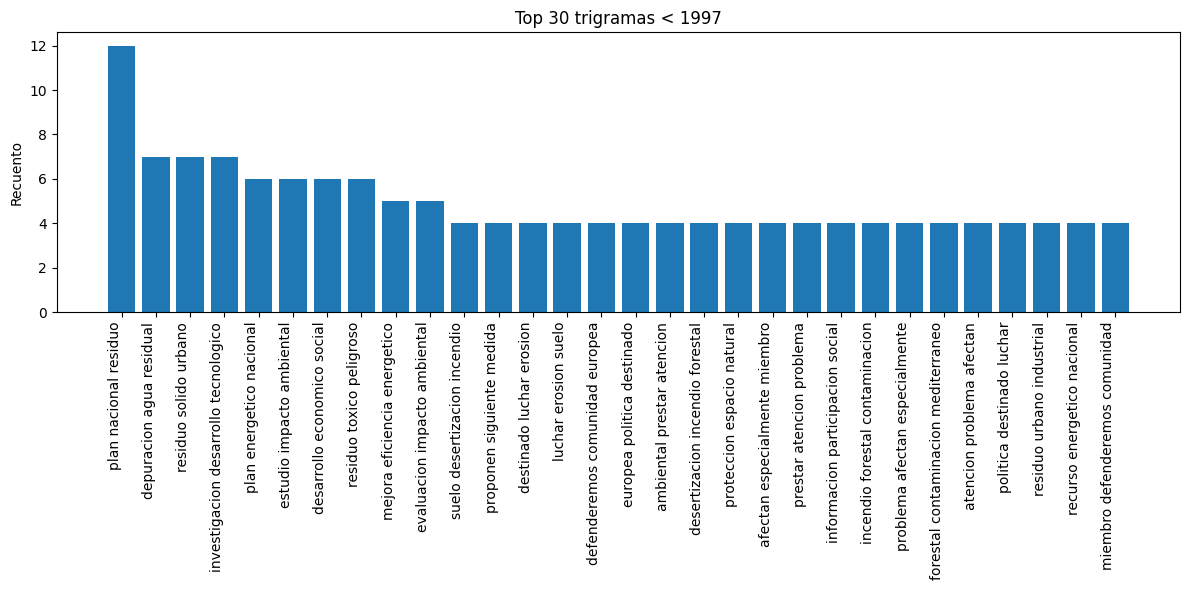

In [40]:
# 1) Filtrar todos los programas con Año < 1997
df_pre97 = df_agrupado[df_agrupado['Año'] < 1997]

# 2) Extraer la columna lematizada y eliminar posibles NaN
texts_pre97 = df_pre97['Texto lematizado'].dropna().tolist()

# 3) Vectorizador de recuentos para trigramas SIN ACENTOS
vec_tri_pre97 = CountVectorizer(
    ngram_range=(3, 3),                     # solo trigramas
    token_pattern=r'(?u)\b\w+\b',           # conserva solo tokens alfanuméricos
    preprocessor=lambda doc: unidecode(doc) # elimina acentos antes de tokenizar
)

# 4) Ajustar y transformar el corpus
X_tri_pre97 = vec_tri_pre97.fit_transform(texts_pre97)

# 5) Sumar recuentos de cada trigrama
trigrams_pre97 = vec_tri_pre97.get_feature_names_out()
counts_tri_pre97 = X_tri_pre97.sum(axis=0).A1

# 6) Crear DataFrame ordenado y quedarnos con top 30
df_tri_pre97 = (
    pd.DataFrame({'Trigrama': trigrams_pre97, 'Recuento': counts_tri_pre97})
      .sort_values('Recuento', ascending=False)
      .head(30)
)

# 7) Graficar con etiquetas legibles
plt.figure(figsize=(12, 6))
plt.bar(df_tri_pre97['Trigrama'], df_tri_pre97['Recuento'])
plt.xticks(rotation=90, ha='right')       # rotar 90° y alinear a la derecha
plt.subplots_adjust(bottom=0.3)            # dejar más espacio abajo
plt.ylabel('Recuento')
plt.title('Top 30 trigramas < 1997')
plt.tight_layout()
plt.show()

In [41]:
# 1) Mostrar todo el top 30 de trigramas de programas con Año < 1997 con sus recuentos
print(df_tri_pre97)

                                   Trigrama  Recuento
13312                 plan nacional residuo        12
4874               depuracion agua residual         7
16233                 residuo solido urbano         7
10486  investigacion desarrollo tecnologico         7
13280              plan energetico nacional         6
7624              estudio impacto ambiental         6
4998            desarrollo economico social         6
16239              residuo toxico peligroso         6
11371          mejora eficiencia energetico         5
7715           evaluacion impacto ambiental         5
17477          suelo desertizacion incendio         4
14835             proponen siguiente medida         4
5206               destinado luchar erosion         4
10895                  luchar erosion suelo         4
4690         defenderemos comunidad europea         4
7678             europea politica destinado         4
1061             ambiental prestar atencion         4
5167        desertizacion in

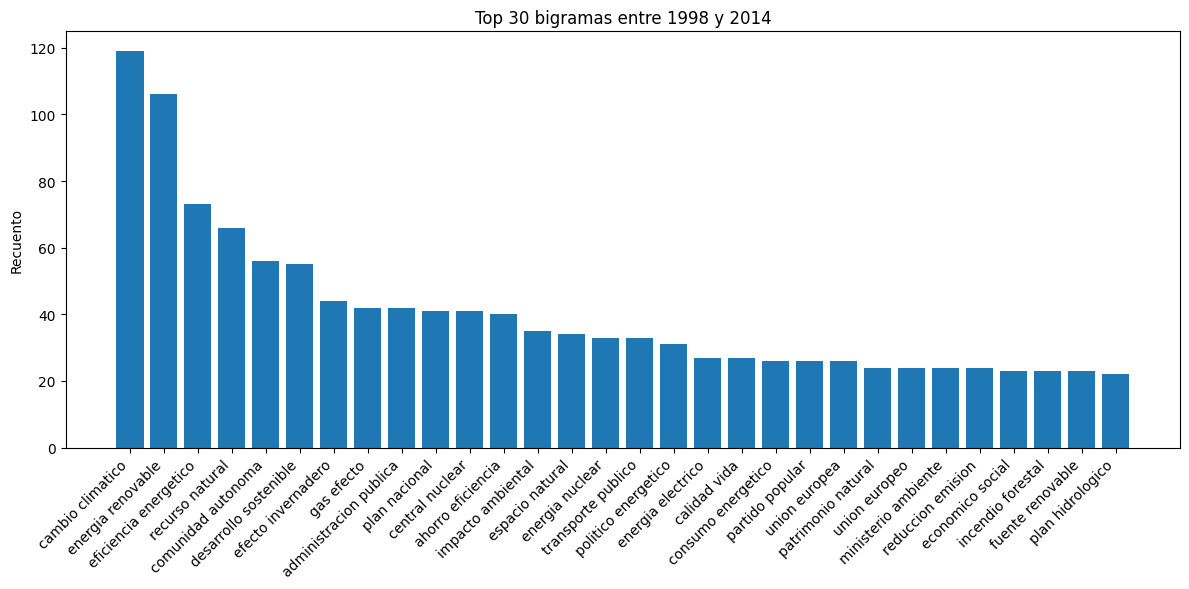

In [42]:
# Función para eliminar acentos con unicodedata
def strip_accents(text):
    return ''.join(
        c for c in unicodedata.normalize('NFKD', text)
        if not unicodedata.combining(c)
    )

# 1) Filtrar programas con Año entre 1998 y 2014 inclusive
df_98_14 = df_agrupado[(df_agrupado['Año'] >= 1998) & (df_agrupado['Año'] <= 2014)]

# 2) Extraer la columna lematizada y eliminar posibles NaN
texts_98_14 = df_98_14['Texto lematizado'].dropna().tolist()

# 3) Vectorizador de recuentos para bigramas SIN ACENTOS
vec_98_14 = CountVectorizer(
    ngram_range=(2, 2),                     # solo bigramas
    token_pattern=r'(?u)\b\w+\b',           # conserva solo tokens alfanuméricos
    preprocessor=lambda doc: strip_accents(doc) # elimina acentos antes de tokenizar
)

# 4) Ajustar y transformar el corpus
X_98_14 = vec_98_14.fit_transform(texts_98_14)

# 5) Sumar recuentos de cada bigrama
bigrams_98_14 = vec_98_14.get_feature_names_out()
counts_98_14 = X_98_14.sum(axis=0).A1

# 6) Crear DataFrame completo de bigramas
df_bi_98_14 = pd.DataFrame({
    'Bigrama': bigrams_98_14,
    'Recuento': counts_98_14
})

# 7) Eliminar el bigrama no deseado "eaj pnv"
df_bi_98_14 = df_bi_98_14[df_bi_98_14['Bigrama'] != 'eaj pnv']

# 8) Ordenar y quedarnos con los 30 bigramas más frecuentes
df_bi_98_14 = df_bi_98_14.sort_values('Recuento', ascending=False).head(30)

# 9) Graficar con etiquetas legibles
plt.figure(figsize=(12,6))
plt.bar(df_bi_98_14['Bigrama'], df_bi_98_14['Recuento'])
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.25)
plt.ylabel('Recuento')
plt.title('Top 30 bigramas entre 1998 y 2014')
plt.tight_layout()
plt.show()

In [43]:
# 1) Mostrar todo el top 30 de bigramas entre 1998 y 2014 con sus recuentos
print(df_bi_98_14)

                      Bigrama  Recuento
4814         cambio climatico       119
13098       energia renovable       106
11757   eficiencia energetico        73
29538         recurso natural        66
6895       comunidad autonoma        56
10118   desarrollo sostenible        55
11670      efecto invernadero        44
16805              gas efecto        42
884    administracion publica        42
25726           plan nacional        41
5517          central nuclear        41
1628        ahorro eficiencia        40
17991       impacto ambiental        35
13586         espacio natural        34
13059         energia nuclear        33
34569      transporte publico        33
26274     politico energetico        31
13004       energia electrico        27
4775             calidad vida        27
7719       consumo energetico        26
25003         partido popular        26
34960           union europea        26
25052      patrimonio natural        24
34961           union europeo        24


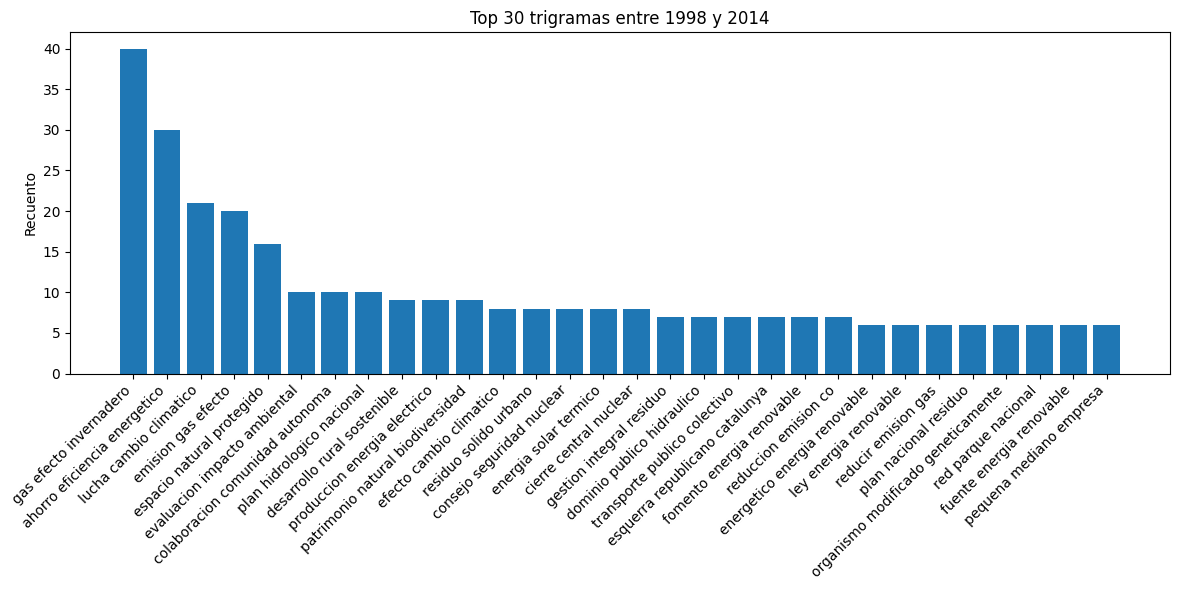

In [44]:
# 1) Filtrar programas con Año entre 1998 y 2014 inclusive
df_98_14 = df_agrupado[(df_agrupado['Año'] >= 1998) & (df_agrupado['Año'] <= 2014)]

# 2) Extraer la columna lematizada y eliminar posibles NaN
texts_98_14 = df_98_14['Texto lematizado'].dropna().tolist()

# 3) Vectorizador de recuentos para trigramas SIN ACENTOS
vec_tri_98_14 = CountVectorizer(
    ngram_range=(3, 3),                     # solo trigramas
    token_pattern=r'(?u)\b\w+\b',           # conserva solo tokens alfanuméricos
    preprocessor=lambda doc: unidecode(doc) # elimina acentos antes de tokenizar
)

# 4) Ajustar y transformar el corpus
X_tri_98_14 = vec_tri_98_14.fit_transform(texts_98_14)

# 5) Sumar recuentos de cada trigrama
trigrams_98_14   = vec_tri_98_14.get_feature_names_out()
counts_tri_98_14 = X_tri_98_14.sum(axis=0).A1

# 6) Crear DataFrame ordenado y eliminar el trigrama no deseado
df_tri_98_14 = (
    pd.DataFrame({'Trigrama': trigrams_98_14, 'Recuento': counts_tri_98_14})
      .sort_values('Recuento', ascending=False)
)

# 6b) Filtrar fuera el trigrama exacto "eaj pnv apuesta"
df_tri_98_14 = df_tri_98_14[df_tri_98_14['Trigrama'] != 'eaj pnv apuesta']

# 7) Quedarnos con los 30 primeros tras la limpieza
df_tri_98_14 = df_tri_98_14.head(30)

# 8) Graficar con etiquetas legibles
plt.figure(figsize=(12, 6))
plt.bar(df_tri_98_14['Trigrama'], df_tri_98_14['Recuento'])
plt.xticks(rotation=45, ha='right')       # rotar 45° y alinear a la derecha
plt.subplots_adjust(bottom=0.3)            # dejar más espacio abajo
plt.ylabel('Recuento')
plt.title('Top 30 trigramas entre 1998 y 2014')
plt.tight_layout()
plt.show()


In [45]:
# 1) Mostrar todo el top 30 de trigramas entre 1998 y 2014 con sus recuentos
print(df_tri_98_14)

                                 Trigrama  Recuento
20049              gas efecto invernadero        40
1968         ahorro eficiencia energetico        30
25262              lucha cambio climatico        21
14710                  emision gas efecto        20
16421           espacio natural protegido        16
17797        evaluacion impacto ambiental        10
7397      colaboracion comunidad autonoma        10
30734           plan hidrologico nacional        10
12005         desarrollo rural sostenible         9
32952        produccion energia electrico         9
29950    patrimonio natural biodiversidad         9
13855             efecto cambio climatico         8
37012               residuo solido urbano         8
8678            consejo seguridad nuclear         8
15867               energia solar termico         8
6810               cierre central nuclear         8
20587            gestion integral residuo         7
13109          dominio publico hidraulico         7
41554       

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'd', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'm', 'mustn', 're', 's', 'shan', 'shouldn', 't', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(


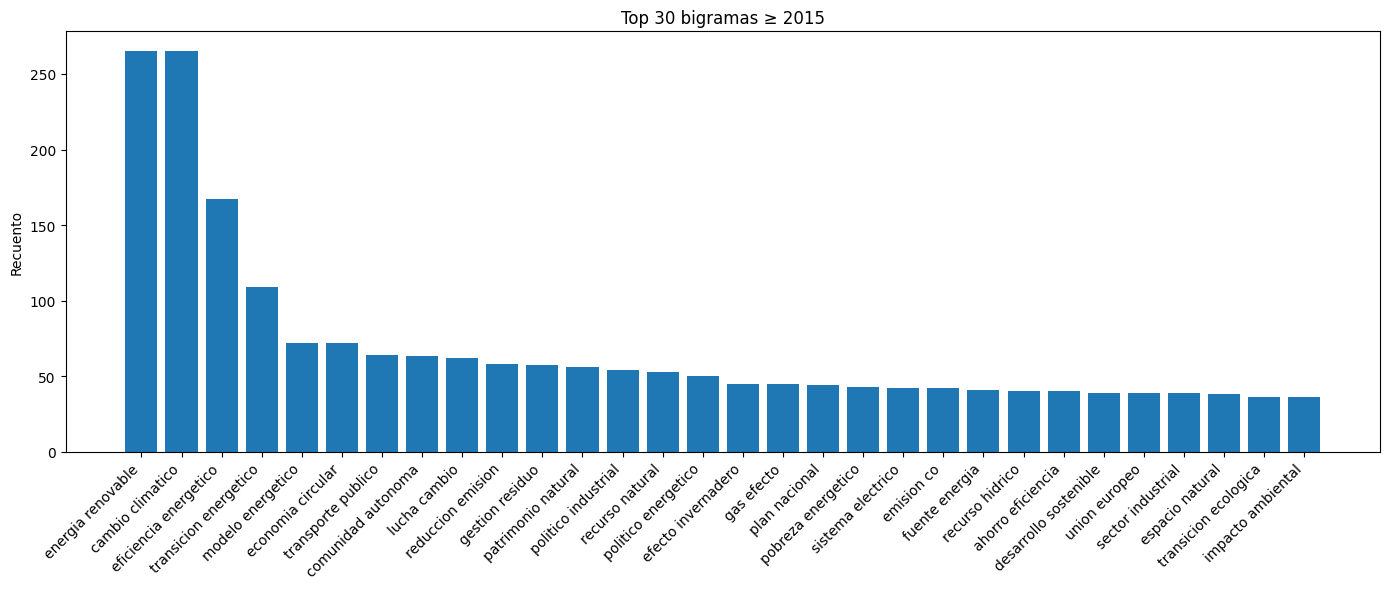

In [46]:
# Función para eliminar acentos con unicodedata
def strip_accents(text):
    return ''.join(
        c for c in unicodedata.normalize('NFKD', text)
        if not unicodedata.combining(c)
    )

# 1) Filtrar programas con Año >= 2015
df_2015_plus = df_agrupado[df_agrupado['Año'] >= 2015]

# 2) Extraer la columna lematizada y eliminar posibles NaN
texts_2015_plus = df_2015_plus['Texto lematizado'].dropna().tolist()

# 3) Convertir tu set de stopwords a lista (si lo usas)
mis_stopwords_list = list(mis_stopwords)

# 4) Vectorizador de recuentos para bigramas SIN ACENTOS
vec_2015_plus = CountVectorizer(
    ngram_range=(2, 2),
    stop_words=mis_stopwords_list,
    preprocessor=lambda doc: strip_accents(doc),  # elimina acentos antes de tokenizar
    token_pattern=r'(?u)\b\w+\b'
)

# 5) Ajustar y transformar el corpus
X_2015_plus = vec_2015_plus.fit_transform(texts_2015_plus)

# 6) Sumar recuentos de cada bigrama
bigrams_2015_plus = vec_2015_plus.get_feature_names_out()
counts_2015_plus = X_2015_plus.sum(axis=0).A1

# 7) Crear DataFrame y quedarnos con top 30
df_bi_2015_plus = (
    pd.DataFrame({'Bigrama': bigrams_2015_plus, 'Recuento': counts_2015_plus})
      .sort_values('Recuento', ascending=False)
      .head(30)
)

# 8) Graficar con etiquetas legibles
plt.figure(figsize=(14, 6))
plt.bar(df_bi_2015_plus['Bigrama'], df_bi_2015_plus['Recuento'])
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.25)
plt.ylabel('Recuento')
plt.title('Top 30 bigramas ≥ 2015')
plt.tight_layout()
plt.show()

In [47]:
# 1) Mostrar todo el top 30 de bigramas desde 2015 con sus recuentos
print(df_bi_2015_plus)

                     Bigrama  Recuento
14914      energia renovable       265
5204        cambio climatico       265
13136  eficiencia energetico       167
39411  transicion energetico       109
26083      modelo energetico        72
12550      economia circular        72
39576     transporte publico        64
7729      comunidad autonoma        63
24393           lucha cambio        62
34012      reduccion emision        58
19722        gestion residuo        57
28948     patrimonio natural        56
30284    politico industrial        54
33854        recurso natural        53
30277    politico energetico        50
13064     efecto invernadero        45
19289             gas efecto        45
29702          plan nacional        44
30053     pobreza energetico        43
36936      sistema electrico        42
13794             emision co        42
18711         fuente energia        41
33829        recurso hidrico        40
1677       ahorro eficiencia        40
11188  desarrollo sosteni

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'd', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'm', 'mustn', 're', 's', 'shan', 'shouldn', 't', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(


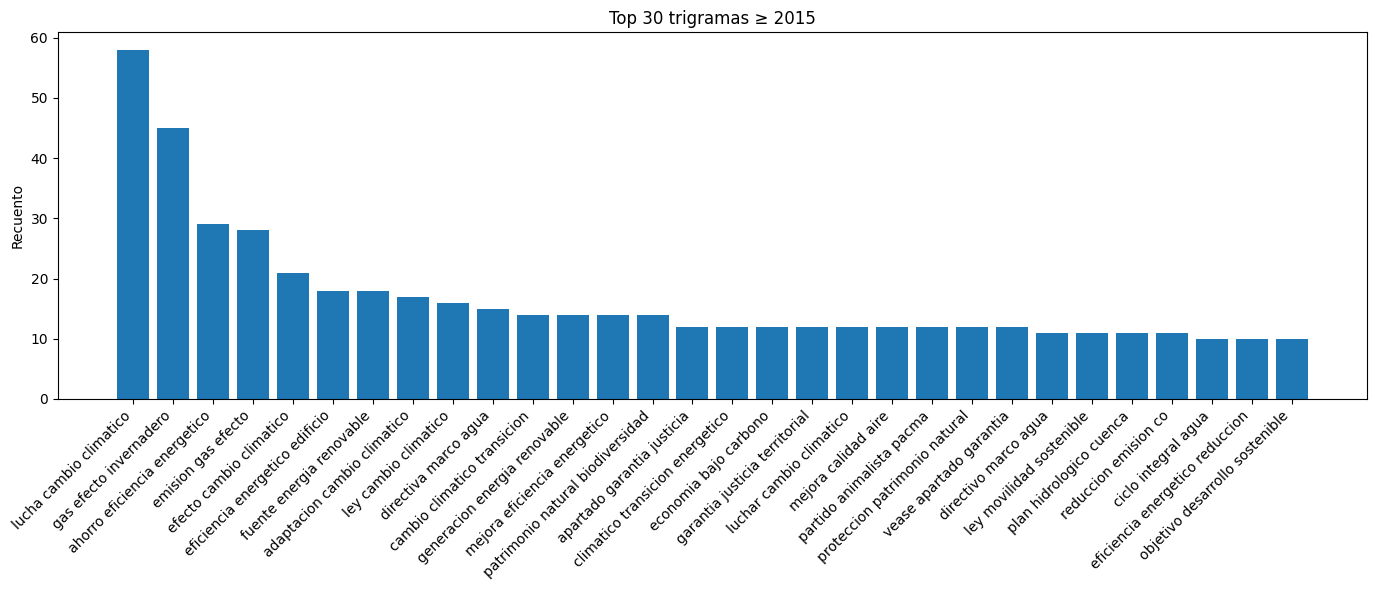

In [48]:
# Función para eliminar acentos con unicodedata
def strip_accents(text):
    return ''.join(
        c for c in unicodedata.normalize('NFKD', text)
        if not unicodedata.combining(c)
    )

# 1) Filtrar programas con Año ≥ 2015
df_2015_plus = df_agrupado[df_agrupado['Año'] >= 2015]

# 2) Extraer la columna lematizada y eliminar posibles NaN
texts_2015_plus = df_2015_plus['Texto lematizado'].dropna().tolist()

# 3) Convertir tu set de stopwords a lista (si lo usas)
mis_stopwords_list = list(mis_stopwords)

# 4) Vectorizador de recuentos para **trigramas** SIN ACENTOS
vec_tri_2015_plus = CountVectorizer(
    ngram_range=(3, 3),                     # solo trigramas
    stop_words=mis_stopwords_list,          # lista de stopwords personalizada
    preprocessor=lambda doc: strip_accents(doc),  # elimina acentos antes de tokenizar
    token_pattern=r'(?u)\b\w+\b'            # conserva solo tokens alfanuméricos
)

# 5) Ajustar y transformar el corpus
X_tri_2015_plus = vec_tri_2015_plus.fit_transform(texts_2015_plus)

# 6) Sumar recuentos de cada trigrama
trigrams_2015_plus = vec_tri_2015_plus.get_feature_names_out()
counts_tri_2015_plus = X_tri_2015_plus.sum(axis=0).A1

# 7) (Opcional) Eliminar trigramas no deseados
extras_tri = {'vehicu el electrico', 'vear apartado garantia'}
filtered_tri = [
    (k, v) for k, v in zip(trigrams_2015_plus, counts_tri_2015_plus)
    if k not in extras_tri
]

# 8) Ordenar y quedarnos con los 30 trigramas más frecuentes
top30_tri = sorted(filtered_tri, key=lambda x: x[1], reverse=True)[:30]
df_tri_2015_plus = pd.DataFrame(top30_tri, columns=['Trigrama','Recuento'])

# 9) Graficar con etiquetas legibles
plt.figure(figsize=(14, 6))
plt.bar(df_tri_2015_plus['Trigrama'], df_tri_2015_plus['Recuento'])
plt.xticks(rotation=45, ha='right')       # rotar 45° y alinear a la derecha
plt.subplots_adjust(bottom=0.3)            # dejar más espacio abajo
plt.ylabel('Recuento')
plt.title('Top 30 trigramas ≥ 2015')
plt.tight_layout()
plt.show()

In [49]:
# 1) Mostrar todo el top 30 de trigramas desde 2015 con sus recuentos
print(df_tri_2015_plus)

                            Trigrama  Recuento
0             lucha cambio climatico        58
1             gas efecto invernadero        45
2       ahorro eficiencia energetico        29
3                 emision gas efecto        28
4            efecto cambio climatico        21
5     eficiencia energetico edificio        18
6           fuente energia renovable        18
7        adaptacion cambio climatico        17
8               ley cambio climatico        16
9               directiva marco agua        15
10       cambio climatico transicion        14
11      generacion energia renovable        14
12      mejora eficiencia energetico        14
13  patrimonio natural biodiversidad        14
14        apartado garantia justicia        12
15   climatico transicion energetico        12
16             economia bajo carbono        12
17     garantia justicia territorial        12
18           luchar cambio climatico        12
19               mejora calidad aire        12
20          p

ANÁLISIS BIGRAMAS Y TRIGRAMAS: COMPARATIVA IDEOLÓGICA

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'd', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'm', 'mustn', 're', 's', 'shan', 'shouldn', 't', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(


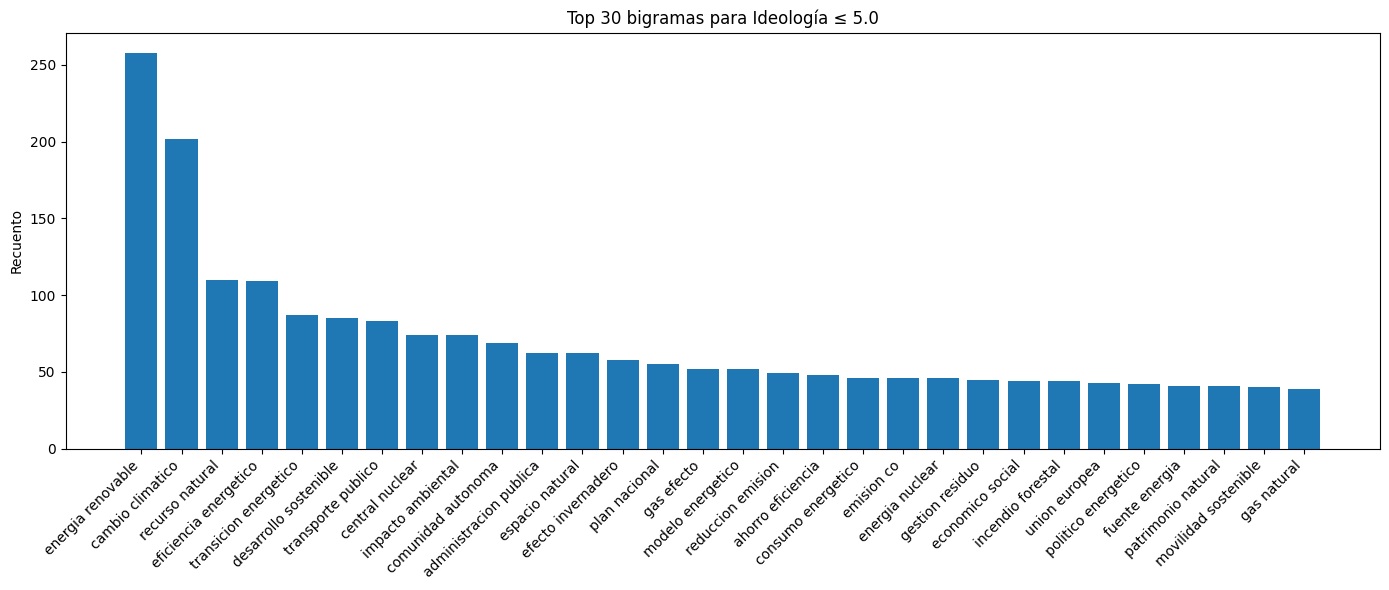

In [50]:
# Función para eliminar acentos con unicodedata
def strip_accents(text):
    return ''.join(
        c for c in unicodedata.normalize('NFKD', text)
        if not unicodedata.combining(c)
    )

# 1) Filtrar programas con Ideología ≤ 5.0
df_low_ideol = df_agrupado[df_agrupado['Ideología'] <= 5.0]

# 2) Sacar la columna lematizada y eliminar posibles NaN
texts_low_ideol = df_low_ideol['Texto lematizado'].dropna().tolist()

# 3) Convertir tu set de stopwords a lista (si lo usas)
mis_stopwords_list = list(mis_stopwords)

# 4) Configurar CountVectorizer para solo bigramas SIN acentos
vec_low_ideol = CountVectorizer(
    ngram_range=(2, 2),                      # solo bigramas
    stop_words=mis_stopwords_list,           # lista de stopwords personalizada
    preprocessor=lambda doc: strip_accents(doc),  # elimina acentos antes de tokenizar
    token_pattern=r'(?u)\b\w+\b'             # conserva solo tokens alfanuméricos
)

# 5) Ajustar y transformar el corpus
X_low_ideol = vec_low_ideol.fit_transform(texts_low_ideol)

# 6) Sumar recuentos de cada bigrama
bigrams_low_ideol = vec_low_ideol.get_feature_names_out()
counts_low_ideol = X_low_ideol.sum(axis=0).A1

# 7) (Opcional) Eliminar bigramas no deseados
extras = {'vehicu el'}  # asegúrate de usar la forma sin acento
filtered_low = [
    (big, cnt) for big, cnt in zip(bigrams_low_ideol, counts_low_ideol)
    if big not in extras
]

# 8) Ordenar y quedarnos con los 30 bigramas más frecuentes
top30_low = sorted(filtered_low, key=lambda x: x[1], reverse=True)[:30]
df_bi_low_ideol = pd.DataFrame(top30_low, columns=['Bigrama','Recuento'])

# 9) Graficar con etiquetas legibles
plt.figure(figsize=(14, 6))
plt.bar(df_bi_low_ideol['Bigrama'], df_bi_low_ideol['Recuento'])
plt.xticks(rotation=45, ha='right')       # rotar 45° y alinear a la derecha
plt.subplots_adjust(bottom=0.25)            # dejar espacio para las etiquetas
plt.ylabel('Recuento')
plt.title('Top 30 bigramas para Ideología ≤ 5.0')
plt.tight_layout()
plt.show()

In [51]:
# 1) Mostrar todo el top 30 de bigramas para Ideología ≤ 5.0 con sus recuentos
print(df_bi_low_ideol)

                   Bigrama  Recuento
0        energia renovable       258
1         cambio climatico       202
2          recurso natural       110
3    eficiencia energetico       109
4    transicion energetico        87
5    desarrollo sostenible        85
6       transporte publico        83
7          central nuclear        74
8        impacto ambiental        74
9       comunidad autonoma        69
10  administracion publica        62
11         espacio natural        62
12      efecto invernadero        58
13           plan nacional        55
14              gas efecto        52
15       modelo energetico        52
16       reduccion emision        49
17       ahorro eficiencia        48
18      consumo energetico        46
19              emision co        46
20         energia nuclear        46
21         gestion residuo        45
22        economico social        44
23       incendio forestal        44
24           union europea        43
25     politico energetico        42
2

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'd', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'm', 'mustn', 're', 's', 'shan', 'shouldn', 't', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(


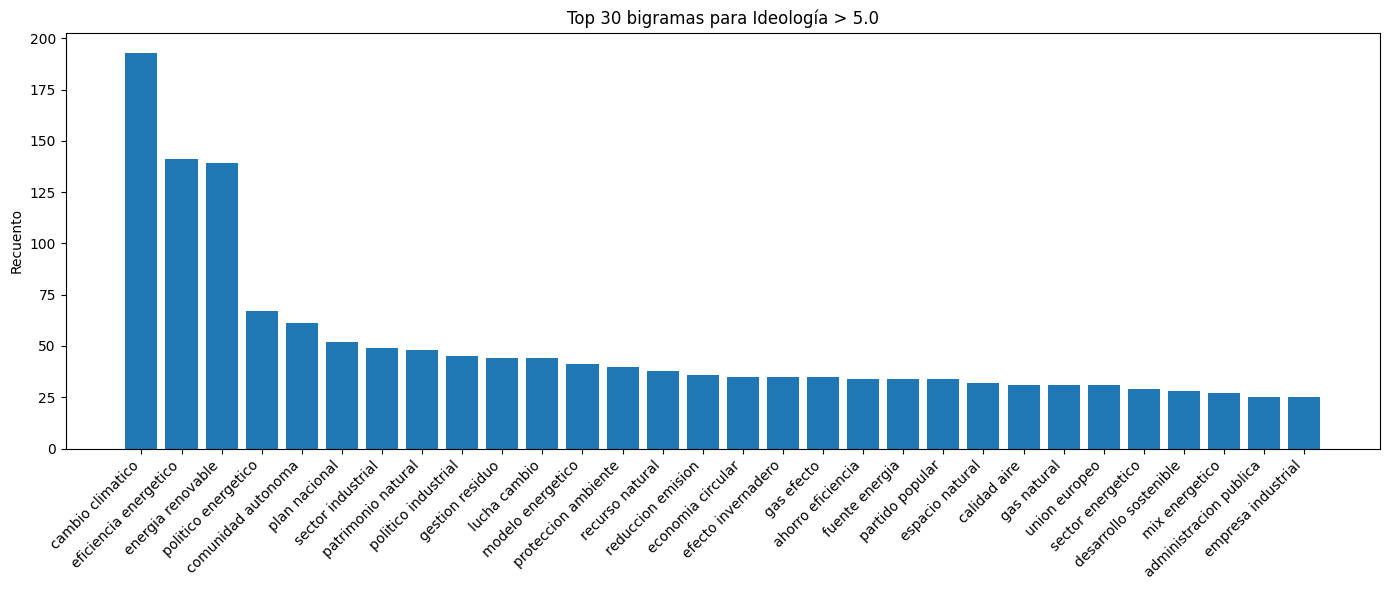

In [52]:
# Función para eliminar acentos con unicodedata
def strip_accents(text):
    return ''.join(
        c for c in unicodedata.normalize('NFKD', text)
        if not unicodedata.combining(c)
    )

# 1) Filtrar programas con Ideología > 5.0
df_high_ideol = df_agrupado[df_agrupado['Ideología'] > 5.0]

# 2) Extraer la columna lematizada y eliminar posibles NaN
texts_high_ideol = df_high_ideol['Texto lematizado'].dropna().tolist()

# 3) Convertir tu set de stopwords a lista (si lo usas)
mis_stopwords_list = list(mis_stopwords)

# 4) Configurar CountVectorizer para solo bigramas SIN ACENTOS
vec_high_ideol = CountVectorizer(
    ngram_range=(2, 2),                      # solo bigramas
    stop_words=mis_stopwords_list,           # lista de stopwords personalizada
    preprocessor=lambda doc: strip_accents(doc),  # elimina acentos antes de tokenizar
    token_pattern=r'(?u)\b\w+\b'             # conserva solo tokens alfanuméricos
)

# 5) Ajustar y transformar el corpus
X_high_ideol = vec_high_ideol.fit_transform(texts_high_ideol)

# 6) Sumar recuentos de cada bigrama
bigrams_high_ideol = vec_high_ideol.get_feature_names_out()
counts_high_ideol = X_high_ideol.sum(axis=0).A1

# 7) Filtrar el bigrama no deseado "eaj pnv"
filtered_high = [
    (big, cnt)
    for big, cnt in zip(bigrams_high_ideol, counts_high_ideol)
    if big != 'eaj pnv'
]

# 8) Ordenar y quedarnos con los 30 bigramas más frecuentes
top30_high = sorted(filtered_high, key=lambda x: x[1], reverse=True)[:30]
df_bi_high_ideol = pd.DataFrame(top30_high, columns=['Bigrama', 'Recuento'])

# 9) Graficar con etiquetas legibles
plt.figure(figsize=(14, 6))
plt.bar(df_bi_high_ideol['Bigrama'], df_bi_high_ideol['Recuento'])
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.25)
plt.ylabel('Recuento')
plt.title('Top 30 bigramas para Ideología > 5.0')
plt.tight_layout()
plt.show()


In [53]:
# 1) Mostrar todo el top 30 de bigramas para Ideología > 5.0 con sus recuentos
print(df_bi_high_ideol)

                   Bigrama  Recuento
0         cambio climatico       193
1    eficiencia energetico       141
2        energia renovable       139
3      politico energetico        67
4       comunidad autonoma        61
5            plan nacional        52
6        sector industrial        49
7       patrimonio natural        48
8      politico industrial        45
9          gestion residuo        44
10            lucha cambio        44
11       modelo energetico        41
12     proteccion ambiente        40
13         recurso natural        38
14       reduccion emision        36
15       economia circular        35
16      efecto invernadero        35
17              gas efecto        35
18       ahorro eficiencia        34
19          fuente energia        34
20         partido popular        34
21         espacio natural        32
22            calidad aire        31
23             gas natural        31
24           union europeo        31
25       sector energetico        29
2

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'd', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'm', 'mustn', 're', 's', 'shan', 'shouldn', 't', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(


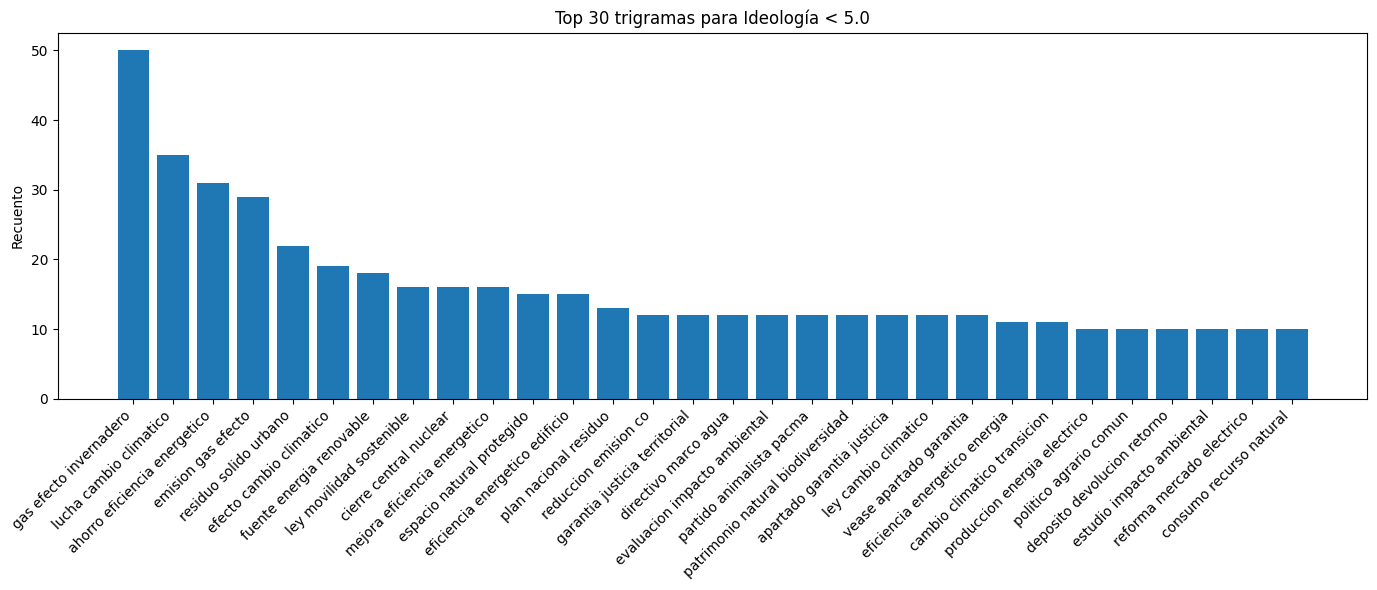

In [54]:
# Función para eliminar acentos con unicodedata
def strip_accents(text):
    return ''.join(
        c for c in unicodedata.normalize('NFKD', text)
        if not unicodedata.combining(c)
    )

# 1) Filtrar programas con Ideología < 5.0
df_low_ideol = df_agrupado[df_agrupado['Ideología'] <= 5.0]

# 2) Extraer la columna lematizada y eliminar posibles NaN
texts_low_ideol = df_low_ideol['Texto lematizado'].dropna().tolist()

# 3) Convertir tu set de stopwords a lista (si lo utilizas)
mis_stopwords_list = list(mis_stopwords)

# 4) Configurar CountVectorizer para solo trigramas SIN ACENTOS
vec_tri_low_ideol = CountVectorizer(
    ngram_range=(3, 3),                      # solo trigramas
    stop_words=mis_stopwords_list,           # lista de stopwords personalizada
    preprocessor=lambda doc: strip_accents(doc),  # elimina acentos antes de tokenizar
    token_pattern=r'(?u)\b\w+\b'             # conserva solo tokens alfanuméricos
)

# 5) Ajustar y transformar el corpus
X_tri_low_ideol = vec_tri_low_ideol.fit_transform(texts_low_ideol)

# 6) Sumar recuentos de cada trigrama
trigrams_low_ideol = vec_tri_low_ideol.get_feature_names_out()
counts_tri_low_ideol = X_tri_low_ideol.sum(axis=0).A1

# 7) Crear DataFrame ordenado y quedarnos con los 30 trigramas más frecuentes
df_tri_low_ideol = (
    pd.DataFrame({'Trigrama': trigrams_low_ideol, 'Recuento': counts_tri_low_ideol})
      .sort_values('Recuento', ascending=False)
      .head(30)
)

# 8) Graficar con etiquetas legibles
plt.figure(figsize=(14, 6))
plt.bar(df_tri_low_ideol['Trigrama'], df_tri_low_ideol['Recuento'])
plt.xticks(rotation=45, ha='right')       # rotar 45° y alinear a la derecha
plt.subplots_adjust(bottom=0.3)            # dejar espacio para las etiquetas
plt.ylabel('Recuento')
plt.title('Top 30 trigramas para Ideología < 5.0')
plt.tight_layout()
plt.show()


In [55]:
# 1) Mostrar todo el top 30 de trigramas para Ideología < 5.0 con sus recuentos
print(df_tri_low_ideol)

                               Trigrama  Recuento
33284            gas efecto invernadero        50
41767            lucha cambio climatico        35
3139       ahorro eficiencia energetico        31
24400                emision gas efecto        29
61447             residuo solido urbano        22
23033           efecto cambio climatico        19
32395          fuente energia renovable        18
40888          ley movilidad sostenible        16
11145            cierre central nuclear        16
43587      mejora eficiencia energetico        16
27206         espacio natural protegido        15
23259    eficiencia energetico edificio        15
51042             plan nacional residuo        13
59279              reduccion emision co        12
32978     garantia justicia territorial        12
20903              directivo marco agua        12
29367      evaluacion impacto ambiental        12
49538          partido animalista pacma        12
49645  patrimonio natural biodiversidad        12


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'd', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'm', 'mustn', 're', 's', 'shan', 'shouldn', 't', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(


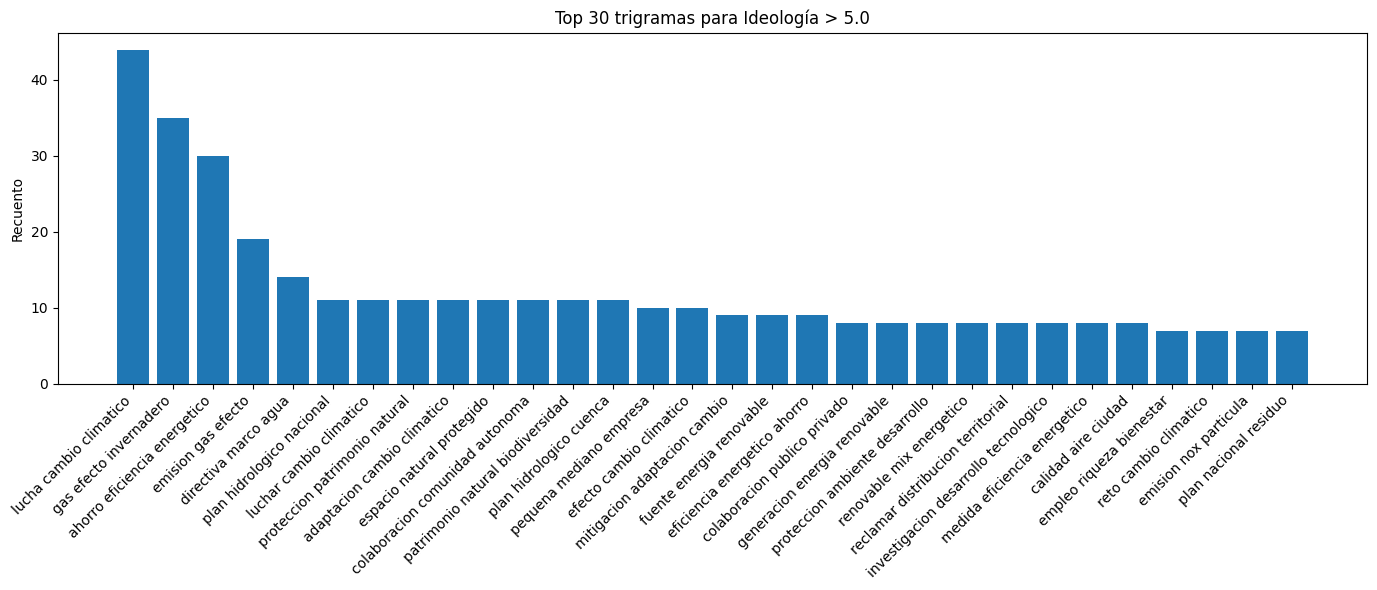

In [56]:
# Función para eliminar acentos con unicodedata
def strip_accents(text):
    return ''.join(
        c for c in unicodedata.normalize('NFKD', text)
        if not unicodedata.combining(c)
    )

# 1) Filtrar programas con Ideología > 5.0
df_high_ideol = df_agrupado[df_agrupado['Ideología'] > 5.0]

# 2) Extraer la columna lematizada y eliminar posibles NaN
texts_high_ideol = df_high_ideol['Texto lematizado'].dropna().tolist()

# 3) Preparar lista de stopwords (si la usas)
mis_stopwords_list = list(mis_stopwords)

# 4) Configurar CountVectorizer para trigramas SIN ACENTOS
vec_tri_high_ideol = CountVectorizer(
    ngram_range=(3, 3),
    stop_words=mis_stopwords_list,
    preprocessor=lambda doc: strip_accents(doc),
    token_pattern=r'(?u)\b\w+\b'
)

# 5) Ajustar y transformar el corpus
X_tri_high_ideol = vec_tri_high_ideol.fit_transform(texts_high_ideol)

# 6) Sumar recuentos de cada trigrama
trigrams_high_ideol = vec_tri_high_ideol.get_feature_names_out()
counts_tri_high_ideol = X_tri_high_ideol.sum(axis=0).A1

# 7) Crear DataFrame ordenado
df_tri_high_ideol = pd.DataFrame({
    'Trigrama': trigrams_high_ideol,
    'Recuento': counts_tri_high_ideol
}).sort_values('Recuento', ascending=False)

# **7b) Eliminar el trigrama exacto "eaj pnv apuesta"**
df_tri_high_ideol = df_tri_high_ideol[
    df_tri_high_ideol['Trigrama'] != 'eaj pnv apuesta'
]

# 8) Quedarnos con los 30 primeros tras filtrar
df_tri_high_ideol = df_tri_high_ideol.head(30)

# 9) Graficar con etiquetas legibles
plt.figure(figsize=(14, 6))
plt.bar(df_tri_high_ideol['Trigrama'], df_tri_high_ideol['Recuento'])
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.3)
plt.ylabel('Recuento')
plt.title('Top 30 trigramas para Ideología > 5.0')
plt.tight_layout()
plt.show()

In [57]:
# 1) Mostrar todo el top 30 de trigramas para Ideología > 5.0 con sus recuentos
print(df_tri_high_ideol)

                                   Trigrama  Recuento
23162                lucha cambio climatico        44
18300                gas efecto invernadero        35
1580           ahorro eficiencia energetico        30
12918                    emision gas efecto        19
10869                  directiva marco agua        14
28180             plan hidrologico nacional        11
23179               luchar cambio climatico        11
31120         proteccion patrimonio natural        11
718             adaptacion cambio climatico        11
14782             espacio natural protegido        11
6321        colaboracion comunidad autonoma        11
27530      patrimonio natural biodiversidad        11
28178               plan hidrologico cuenca        11
27651               pequena mediano empresa        10
12005               efecto cambio climatico        10
24794          mitigacion adaptacion cambio         9
17827              fuente energia renovable         9
12128          eficiencia en

EVOLUCIÓN TEMPORAL DE LA LONGITUD PROGRAMAS ELECTORALES

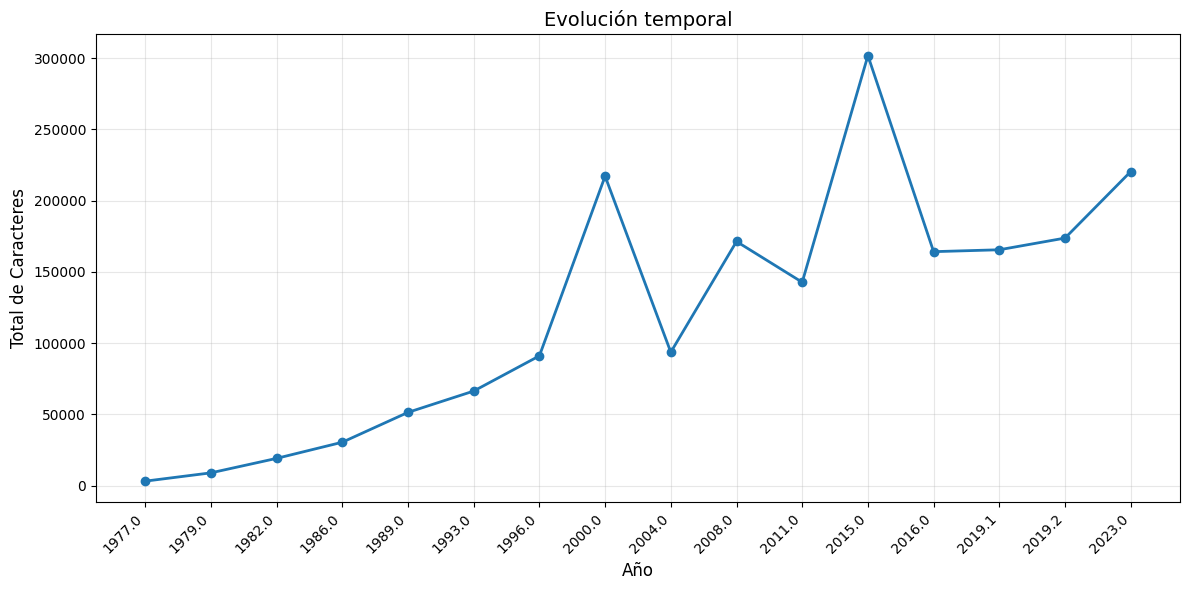

In [58]:
# 1) Agrupar y sumar
df_total = (
    df_agrupado
      .groupby('Año', sort=False)['Longitud palabras']
      .sum()
      .reset_index(name='Total palabras')
)

# 2) Ordenar por floating año para conservar cronología
df_total['Año_f'] = df_total['Año'].astype(float)
df_total.sort_values('Año_f', inplace=True)

# 3) Crear posiciones equidistantes y etiquetas
labels = df_total['Año'].tolist()          # ['1977.0','1979.0',…]
x = list(range(len(labels)))                # [0,1,2,…,len-1]
y = df_total['Total palabras'].values

# 4) Plot usando posiciones
plt.figure(figsize=(12,6))
plt.plot(x, y, marker='o', linestyle='-', linewidth=2, markersize=6)

# 5) Asignar ticks equidistantes con las labels
plt.xticks(x, labels, rotation=45, ha='right')

plt.xlabel('Año', fontsize=12)
plt.ylabel('Total de Caracteres', fontsize=12)
plt.title('Evolución temporal', fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

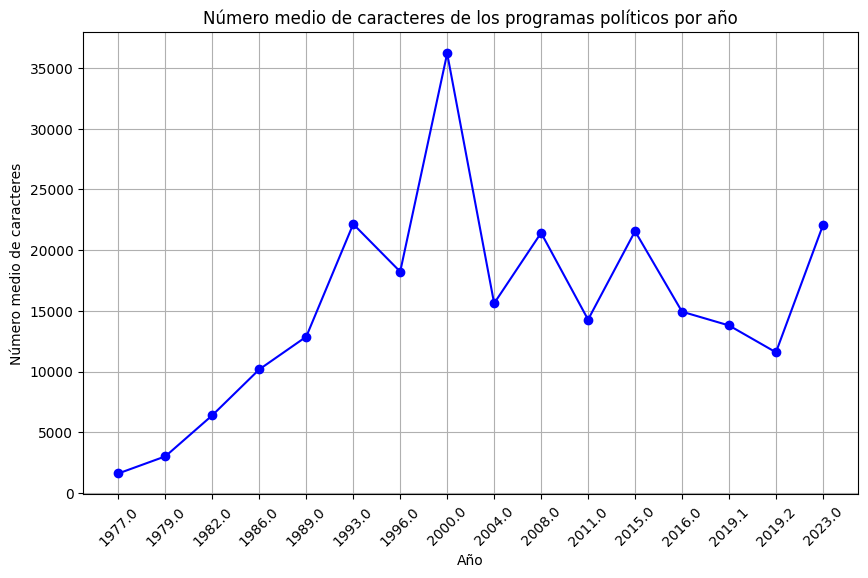

In [59]:
# Asegurarse de que la columna 'Año' esté correctamente como texto
df_agrupado['Año'] = df_agrupado['Año'].astype(str)

# Paso 1: Calcular el número medio de caracteres por año
df_media_caracteres = df_agrupado.groupby('Año')['Longitud palabras'].mean()

# Paso 2: Graficar el histograma
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.plot(df_media_caracteres.index, df_media_caracteres.values, marker='o', linestyle='-', color='b')

# Añadir etiquetas y título
plt.xlabel('Año')
plt.ylabel('Número medio de caracteres')
plt.title('Número medio de caracteres de los programas políticos por año')
plt.grid(True)

# Asegurarse de que los años estén ordenados cronológicamente
plt.xticks(df_media_caracteres.index, rotation=45)  # Rotamos las etiquetas para mayor claridad

# Mostrar el gráfico
plt.show()

EVOLUCIÓN TEMPORAL DE LA LONGITUD DE LA CUESTIÓN MEDIOAMBIENTAL EN LOS PROGRAMAS ELECTORALES

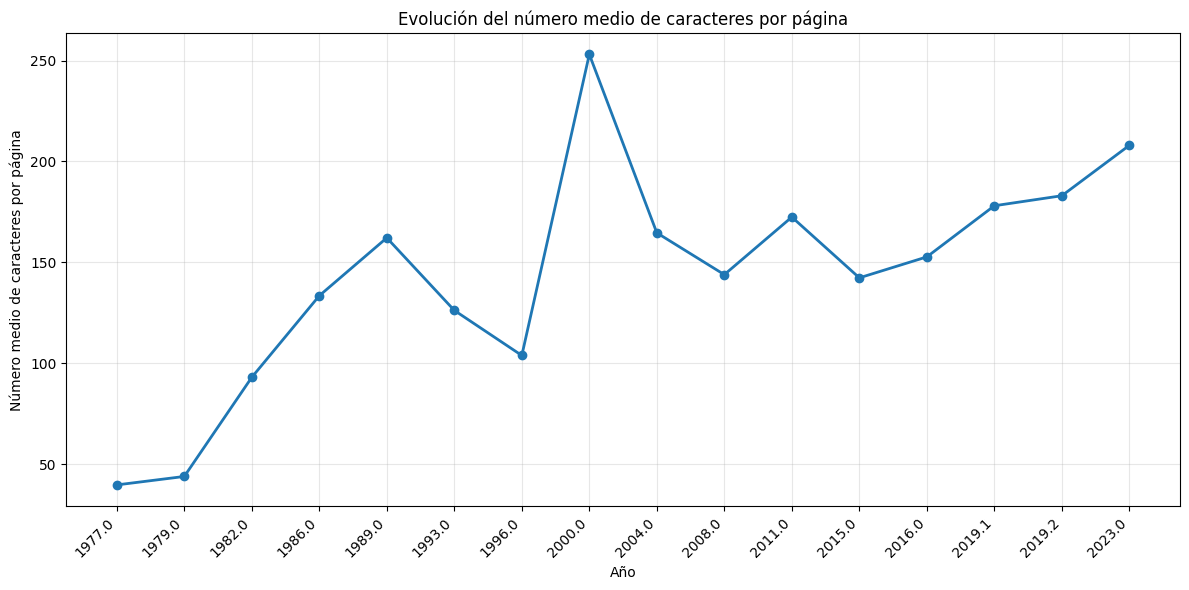

In [60]:
# --- 0) Crear la serie serie_car_pag si no existe aún ---
# Agrupamos por sub-año y calculamos la media de caracteres por página
serie_car_pag = (
    df_agrupado
      .groupby('Año', sort=False)['Nº caracteres/página']
      .mean()
)

# --- 1) Convertir la Serie en DataFrame y resetear índice ---
df_plot = serie_car_pag.reset_index(name='Media_car_pag')

# --- 2) Crear columna float para ordenar correctamente ---
df_plot['Año_f'] = df_plot['Año'].astype(float)

# --- 3) Ordenar cronológicamente por año numérico ---
df_plot.sort_values('Año_f', inplace=True)

# --- 4) Preparar X, Y y etiquetas para espaciar uniformemente ---
x = list(range(len(df_plot)))
y = df_plot['Media_car_pag'].values
labels = df_plot['Año'].tolist()  # sub-años como strings

# --- 5) Dibujar la serie con posiciones equidistantes ---
plt.figure(figsize=(12, 6))
plt.plot(x, y, marker='o', linestyle='-', linewidth=2, markersize=6)

# --- 6) Ajustar ticks con etiquetas originales ---
plt.xticks(x, labels, rotation=45, ha='right')

plt.xlabel('Año')
plt.ylabel('Número medio de caracteres por página')
plt.title('Evolución del número medio de caracteres por página')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

EVOLUCIÓN TEMPORAL DE LA LONGITUD DE LA CUESTIÓN MEDIOAMBIENTAL EN LOS PROGRAMAS ELECTORALES: COMPARATIVA PARTIDOS POLÍTICOS

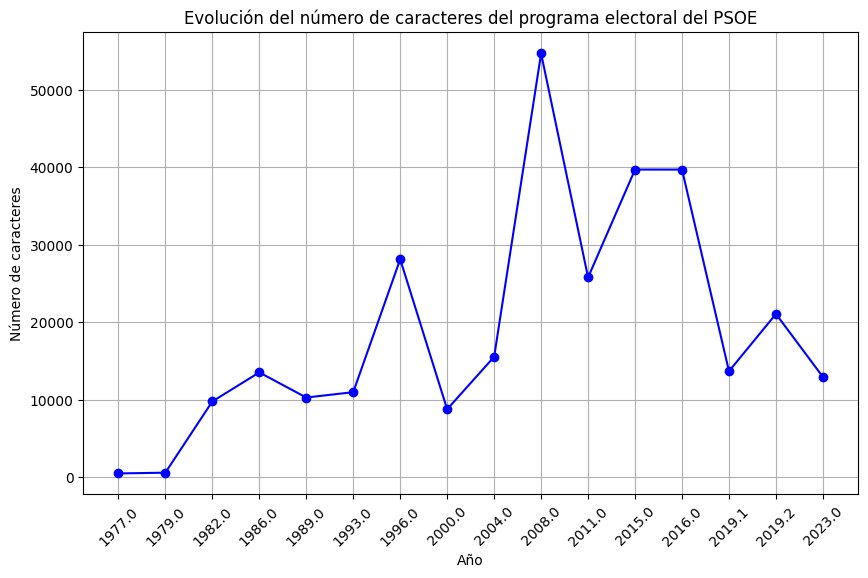

In [61]:

# Filtrar los datos para el PSOE
df_psoe = df_agrupado[df_agrupado['Partido'] == 'PSOE']

# Calcular el número medio de caracteres del programa por año
df_psoe_media_caracteres = df_psoe.groupby('Año')['Longitud palabras'].mean()

# Graficar la evolución del número de caracteres del programa del PSOE
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.plot(df_psoe_media_caracteres.index, df_psoe_media_caracteres.values, marker='o', linestyle='-', color='b')

# Añadir etiquetas y título
plt.xlabel('Año')
plt.ylabel('Número de caracteres')
plt.title('Evolución del número de caracteres del programa electoral del PSOE')
plt.grid(True)

# Asegurarse de que los años estén ordenados cronológicamente
plt.xticks(df_psoe_media_caracteres.index, rotation=45)  # Rotamos las etiquetas para mayor claridad

# Mostrar el gráfico
plt.show()

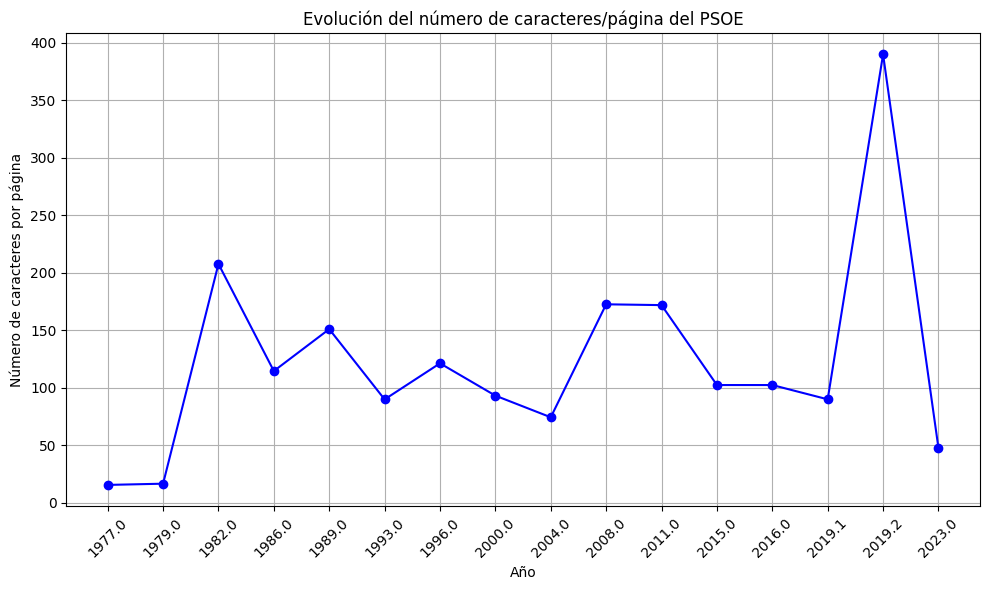

In [62]:
# 1) Crear etiqueta de año como string (para distinguir 2019.1 vs 2019.2)
df_agrupado['Año_label'] = df_agrupado['Año'].astype(str)

# 2) Filtrar solo PSOE
df_psoe = df_agrupado[df_agrupado['Partido'] == 'PSOE'].copy()

# 3) Calcular média de caracteres por página por Año_label
serie_psoe = df_psoe.groupby('Año_label')['Nº caracteres/página'].mean()

# 4) Ordenar cronológicamente (índice numérico) y volver a string
serie_psoe.index = serie_psoe.index.astype(float)
serie_psoe = serie_psoe.sort_index()
serie_psoe.index = serie_psoe.index.astype(str)

# 5) Crear posiciones equidistantes para el eje X
x = list(range(len(serie_psoe)))

# 6) Graficar
plt.figure(figsize=(10,6))
plt.plot(x, serie_psoe.values, marker='o', linestyle='-', color='b')
plt.xticks(x, serie_psoe.index, rotation=45)
plt.xlabel('Año')
plt.ylabel('Número de caracteres por página')
plt.title('Evolución del número de caracteres/página del PSOE')
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-63-3209743991>:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  ((df_agrupado['Partido'] == 'Alianza Popular') & (df_agrupado['Año'].str.contains('^19(7[7-9]|8[0-6])')))]


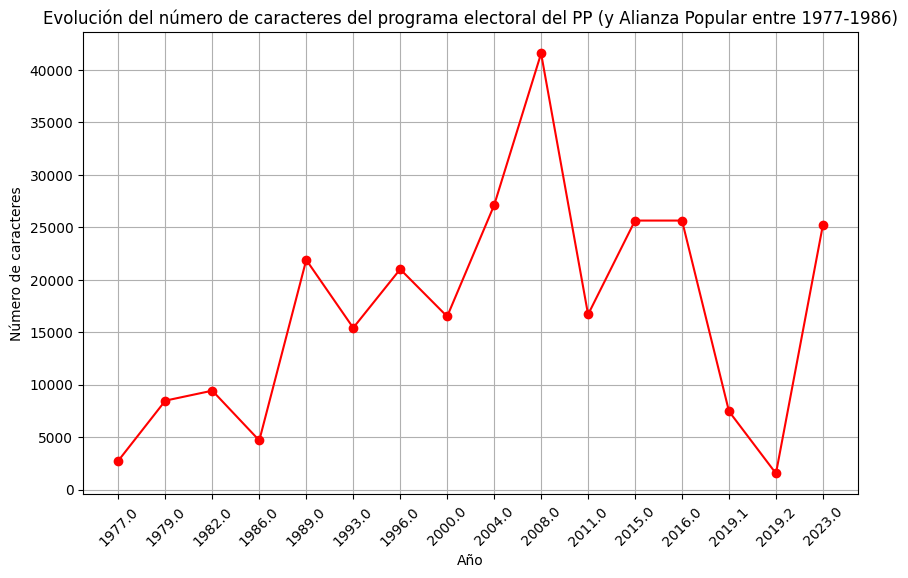

In [63]:
# Asegurarse de que 'Año' esté como texto
df_agrupado['Año'] = df_agrupado['Año'].astype(str)

# Filtrar los datos para el PP y Alianza Popular entre 1977 y 1986
df_pp = df_agrupado[(df_agrupado['Partido'] == 'PP') |
                    ((df_agrupado['Partido'] == 'Alianza Popular') & (df_agrupado['Año'].str.contains('^19(7[7-9]|8[0-6])')))]

# Calcular el número medio de caracteres del programa por año
df_pp_media_caracteres = df_pp.groupby('Año')['Longitud palabras'].mean()

# Graficar la evolución del número de caracteres del programa del PP (y Alianza Popular)
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.plot(df_pp_media_caracteres.index, df_pp_media_caracteres.values, marker='o', linestyle='-', color='r')

# Añadir etiquetas y título
plt.xlabel('Año')
plt.ylabel('Número de caracteres')
plt.title('Evolución del número de caracteres del programa electoral del PP (y Alianza Popular entre 1977-1986)')
plt.grid(True)

# Asegurarse de que los años estén ordenados cronológicamente
plt.xticks(df_pp_media_caracteres.index, rotation=45)  # Rotamos las etiquetas para mayor claridad

# Mostrar el gráfico
plt.show()

<ipython-input-64-584626422>:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  ((df_agrupado['Partido']=='Alianza Popular') & df_agrupado['Año_label'].str.contains(r'^19(7[7-9]|8[0-6])'))


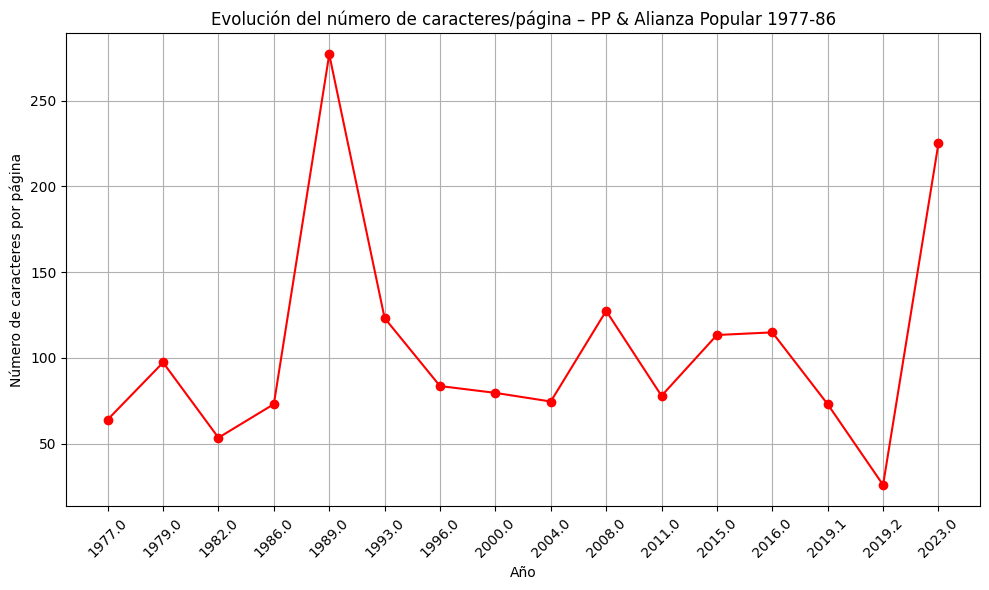

In [64]:
# 1) Crear etiqueta de año como string para distinguir 1977–1986
df_agrupado['Año_label'] = df_agrupado['Año'].astype(str)

# 2) Filtrar solo PP y Alianza Popular entre 1977 y 1986
df_pp = df_agrupado[
    (df_agrupado['Partido']=='PP') |
    ((df_agrupado['Partido']=='Alianza Popular') & df_agrupado['Año_label'].str.contains(r'^19(7[7-9]|8[0-6])'))
]

# 3) Media de caracteres por página por año_label
serie_pp = df_pp.groupby('Año_label')['Nº caracteres/página'].mean()

# 4) Ordenar cronológicamente conservando decimales
serie_pp.index = serie_pp.index.astype(float)
serie_pp = serie_pp.sort_index()
serie_pp.index = serie_pp.index.astype(str)

# 5) Posiciones equidistantes para el eje X
x = list(range(len(serie_pp)))

# 6) Graficar
plt.figure(figsize=(10,6))
plt.plot(x, serie_pp.values, marker='o', linestyle='-', color='r')
plt.xticks(x, serie_pp.index, rotation=45)
plt.xlabel('Año')
plt.ylabel('Número de caracteres por página')
plt.title('Evolución del número de caracteres/página – PP & Alianza Popular 1977-86')
plt.grid(True)
plt.tight_layout()
plt.show()

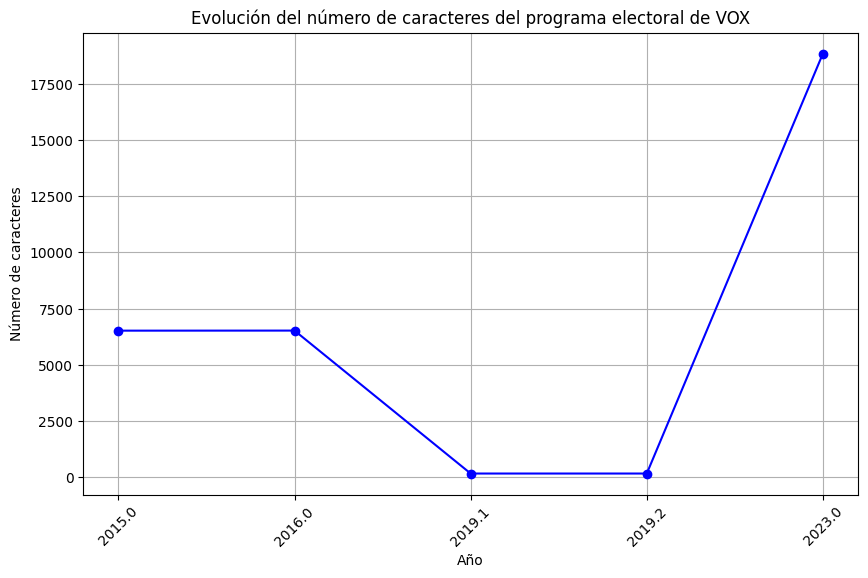

In [65]:
# Filtrar los datos para VOX
df_vox = df_agrupado[df_agrupado['Partido'] == 'VOX']

# Calcular el número medio de caracteres del programa por año
df_vox_media_caracteres = df_vox.groupby('Año')['Longitud palabras'].mean()

# Graficar la evolución del número de caracteres del programa de VOX
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.plot(df_vox_media_caracteres.index, df_vox_media_caracteres.values, marker='o', linestyle='-', color='b')

# Añadir etiquetas y título
plt.xlabel('Año')
plt.ylabel('Número de caracteres')
plt.title('Evolución del número de caracteres del programa electoral de VOX')
plt.grid(True)

# Asegurarse de que los años estén ordenados cronológicamente
plt.xticks(df_vox_media_caracteres.index, rotation=45)  # Rotamos las etiquetas para mayor claridad

# Mostrar el gráfico
plt.show()

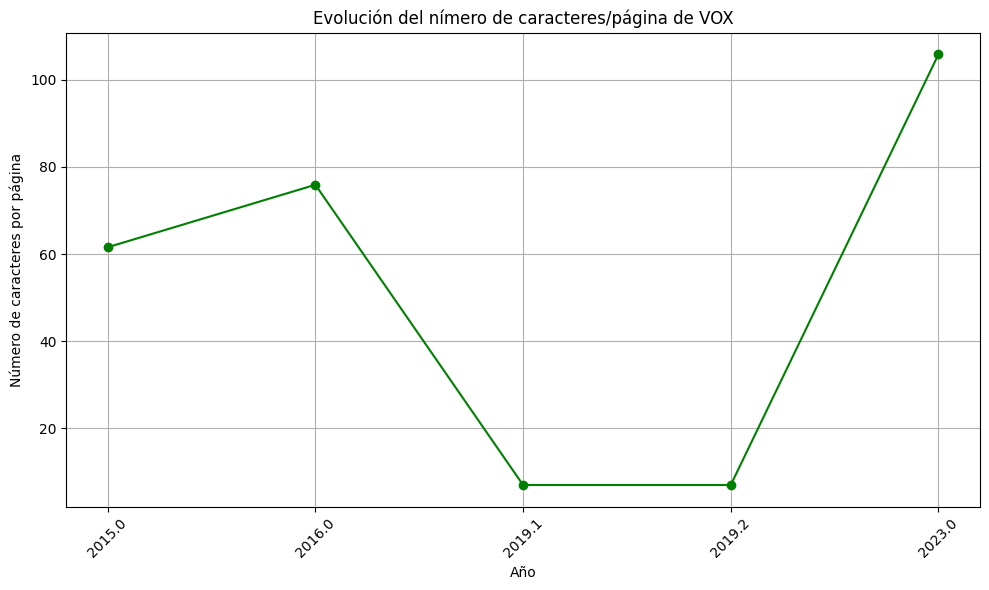

In [66]:
# 1) Crear etiqueta de año como string (para distinguir 2019.1 vs 2019.2)
df_agrupado['Año_label'] = df_agrupado['Año'].astype(str)

# 2) Filtrar solo VOX
df_vox = df_agrupado[df_agrupado['Partido'] == 'VOX'].copy()

# 3) Calcular media de caracteres por página por Año_label
serie_vox = df_vox.groupby('Año_label')['Nº caracteres/página'].mean()

# 4) Ordenar cronológicamente (índice numérico) y volver a string
serie_vox.index = serie_vox.index.astype(float)
serie_vox = serie_vox.sort_index()
serie_vox.index = serie_vox.index.astype(str)

# 5) Crear posiciones equidistantes para el eje X
x = list(range(len(serie_vox)))

# 6) Graficar
plt.figure(figsize=(10,6))
plt.plot(x, serie_vox.values, marker='o', linestyle='-', color='g')
plt.xticks(x, serie_vox.index, rotation=45)
plt.xlabel('Año')
plt.ylabel('Número de caracteres por página')
plt.title('Evolución del nímero de caracteres/página de VOX')
plt.grid(True)
plt.tight_layout()
plt.show()

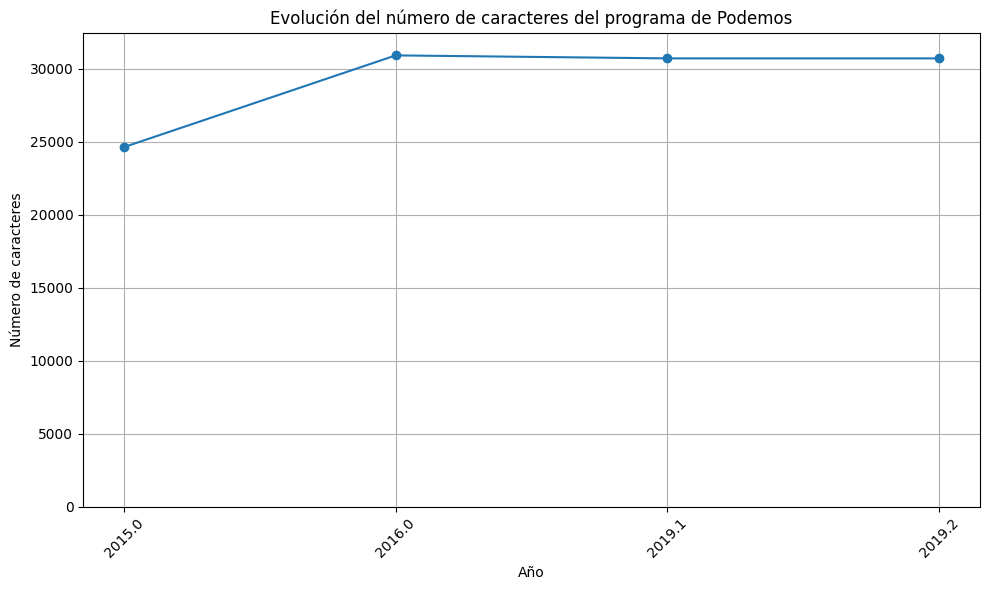

In [67]:

# Filtrar los datos para Podemos
df_podemos = df_agrupado[df_agrupado['Partido'] == 'Podemos']

# Calcular el número medio de palabras del programa por año
serie = df_podemos.groupby('Año')['Longitud palabras'].mean()

plt.figure(figsize=(10, 6))
plt.plot(serie.index, serie.values, marker='o', linestyle='-')

plt.xlabel('Año')
plt.ylabel('Número de caracteres')
plt.title('Evolución del número de caracteres del programa de Podemos')
plt.grid(True)

# Forzar eje Y desde 0 hasta un poco por encima del máximo
plt.ylim(0, serie.max() * 1.05)

# Asegurar que los ticks de X son los años de Podemos
plt.xticks(serie.index, rotation=45)

plt.tight_layout()
plt.show()

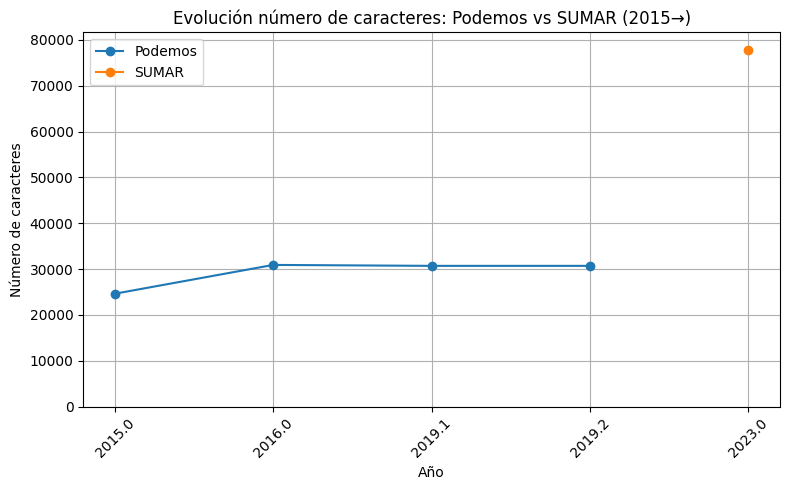

In [68]:
# 1) Filtrar desde 2015 y conservar etiqueta con decimal
df_reciente = df_agrupado[df_agrupado['Año'].astype(float) >= 2015.0].copy()
df_reciente['Año_label'] = df_reciente['Año'].astype(str)

# 2) Pivotar para tener cada partido en columna, índice = Año_label
pivot_lbl = (
    df_reciente
      .pivot_table(
         index='Año_label',
         columns='Partido',
         values='Longitud palabras',
         aggfunc='mean'
      )
)

# 3) Ordenar el índice numéricamente, luego volver a string
pivot_lbl.index = pivot_lbl.index.astype(float)
pivot_lbl = pivot_lbl.sort_index()
pivot_lbl.index = pivot_lbl.index.astype(str)

# 4) Quedarnos solo con las columnas de interés
pivot_ps = pivot_lbl[['Podemos','SUMAR']]

# 5) Crear posiciones equidistantes para el eje X
x = list(range(len(pivot_ps)))

# 6) Dibujar ambas series
plt.figure(figsize=(8,5))
for party in ['Podemos','SUMAR']:
    plt.plot(x, pivot_ps[party].values, marker='o', label=party)

# 7) Ajustes finales
plt.xticks(x, pivot_ps.index, rotation=45)
plt.xlabel('Año')
plt.ylabel('Número de caracteres')
plt.title('Evolución número de caracteres: Podemos vs SUMAR (2015→)')
plt.legend()
plt.grid(True)
plt.ylim(0, pivot_ps.stack().max() * 1.05)
plt.tight_layout()
plt.show()

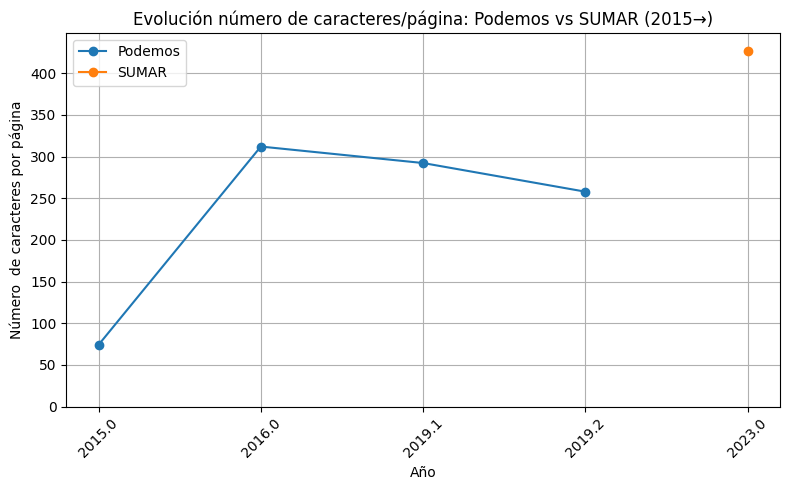

In [69]:
# 1) Filtrar desde 2015 y conservar etiqueta con decimal
df_reciente = df_agrupado[df_agrupado['Año'].astype(float) >= 2015.0].copy()
df_reciente['Año_label'] = df_reciente['Año'].astype(str)

# 2) Pivotar para tener cada partido en columna, índice = Año_label, pero usando caracteres/página
pivot_chars_ppp = (
    df_reciente
      .pivot_table(
         index='Año_label',
         columns='Partido',
         values='Nº caracteres/página',
         aggfunc='mean'
      )
)

# 3) Ordenar el índice numéricamente, luego volver a string
pivot_chars_ppp.index = pivot_chars_ppp.index.astype(float)
pivot_chars_ppp = pivot_chars_ppp.sort_index()
pivot_chars_ppp.index = pivot_chars_ppp.index.astype(str)

# 4) Quedarnos solo con las columnas de interés: Podemos y SUMAR
pivot_chars_ps = pivot_chars_ppp[['Podemos','SUMAR']]

# 5) Crear posiciones equidistantes para el eje X
x = list(range(len(pivot_chars_ps)))

# 6) Dibujar ambas series
plt.figure(figsize=(8,5))
for party in ['Podemos','SUMAR']:
    plt.plot(x, pivot_chars_ps[party].values, marker='o', label=party)

# 7) Ajustes finales
plt.xticks(x, pivot_chars_ps.index, rotation=45)
plt.xlabel('Año')
plt.ylabel('Número  de caracteres por página')
plt.title('Evolución número de caracteres/página: Podemos vs SUMAR (2015→)')
plt.legend()
plt.grid(True)
plt.ylim(0, pivot_chars_ps.stack().max() * 1.05)
plt.tight_layout()
plt.show()

<ipython-input-70-1714410111>:9: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  ((df_agrupado['Partido'] == 'Alianza Popular') & (df_agrupado['Año'].str.contains('^19(7[7-9]|8[0-6])')))]


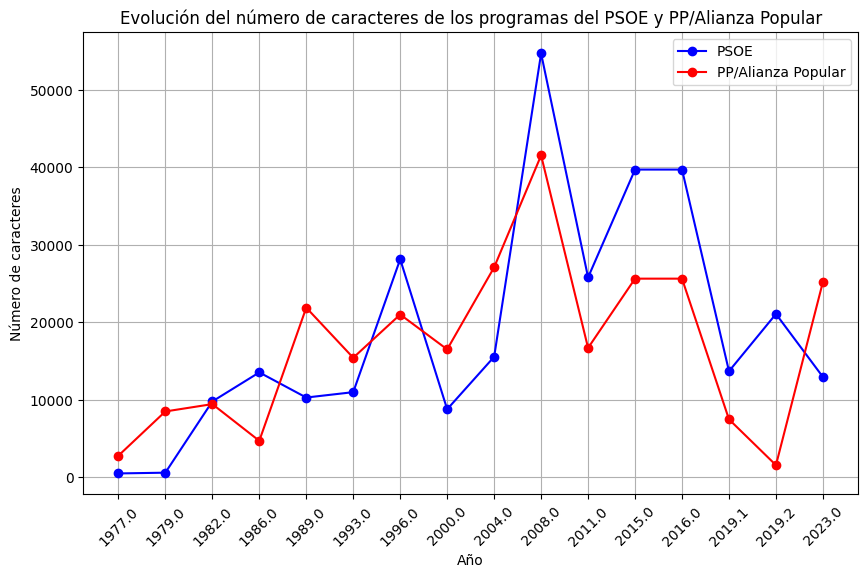

In [70]:
# Filtrar los datos para el PSOE
df_psoe = df_agrupado[df_agrupado['Partido'] == 'PSOE']

# Calcular el número medio de caracteres del programa del PSOE por año
df_psoe_media_caracteres = df_psoe.groupby('Año')['Longitud palabras'].mean()

# Filtrar los datos para el PP (y Alianza Popular entre 1977 y 1986)
df_pp = df_agrupado[(df_agrupado['Partido'] == 'PP') |
                    ((df_agrupado['Partido'] == 'Alianza Popular') & (df_agrupado['Año'].str.contains('^19(7[7-9]|8[0-6])')))]

# Calcular el número medio de caracteres del programa del PP (y Alianza Popular)
df_pp_media_caracteres = df_pp.groupby('Año')['Longitud palabras'].mean()

# Graficar la evolución de ambos partidos en el mismo gráfico
plt.figure(figsize=(10, 6))  # Tamaño de la figura

# Graficar PSOE
plt.plot(df_psoe_media_caracteres.index, df_psoe_media_caracteres.values, marker='o', linestyle='-', color='b', label='PSOE')

# Graficar PP/Alianza Popular
plt.plot(df_pp_media_caracteres.index, df_pp_media_caracteres.values, marker='o', linestyle='-', color='r', label='PP/Alianza Popular')

# Añadir etiquetas y título
plt.xlabel('Año')
plt.ylabel('Número de caracteres')
plt.title('Evolución del número de caracteres de los programas del PSOE y PP/Alianza Popular')
plt.grid(True)

# Asegurarse de que los años estén ordenados cronológicamente
plt.xticks(rotation=45)  # Rotamos las etiquetas para mayor claridad

# Añadir leyenda para distinguir las dos líneas
plt.legend()

# Mostrar el gráfico
plt.show()

<ipython-input-71-1297173867>:15: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  & df_agrupado['Año_label'].str.contains(r'^19(7[7-9]|8[0-6])'))


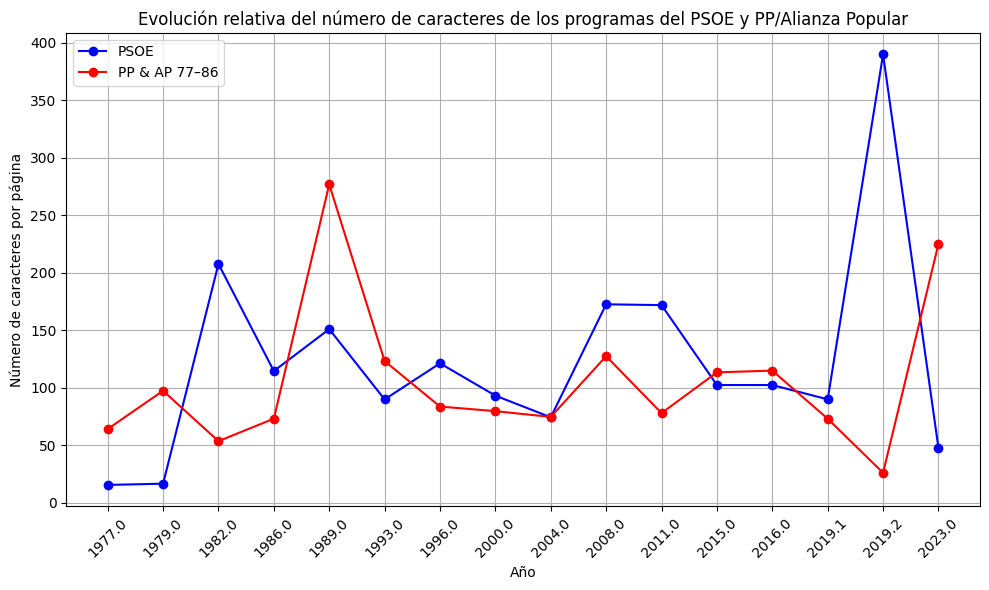

In [71]:

# 1) Asegurarnos de tener la etiqueta string de año
df_agrupado['Año_label'] = df_agrupado['Año'].astype(str)

# 2) Serie PSOE: media de caracteres/página por Año_label
serie_psoe = (
    df_agrupado[df_agrupado['Partido']=='PSOE']
      .groupby('Año_label')['Nº caracteres/página']
      .mean()
)

# 3) Serie PP & AP 1977–86: media de caracteres/página por Año_label
mask_pp = (
    (df_agrupado['Partido']=='PP') |
    ((df_agrupado['Partido']=='Alianza Popular')
      & df_agrupado['Año_label'].str.contains(r'^19(7[7-9]|8[0-6])'))
)
serie_pp = (
    df_agrupado[mask_pp]
      .groupby('Año_label')['Nº caracteres/página']
      .mean()
)

# 4) Unir índices de ambas series y ordenar cronológicamente
all_labels = pd.Index(serie_psoe.index).union(serie_pp.index)
# convertir a float para ordenar por valor numérico, luego a string
sorted_labels = all_labels.astype(float).sort_values().astype(str)

# 5) Reindexar series para que compartan mismo índice
serie_psoe = serie_psoe.reindex(sorted_labels)
serie_pp   = serie_pp.reindex(sorted_labels)

# 6) Posiciones equidistantes en el eje X
x = range(len(sorted_labels))

# 7) Graficar ambas series en un mismo plot
plt.figure(figsize=(10,6))
plt.plot(x, serie_psoe.values, marker='o', linestyle='-', color='b', label='PSOE')
plt.plot(x, serie_pp.values,   marker='o', linestyle='-', color='r', label='PP & AP 77–86')

# 8) Ajustes de ticks y etiquetas
plt.xticks(x, sorted_labels, rotation=45)
plt.xlabel('Año')
plt.ylabel('Número de caracteres por página')
plt.title('Evolución relativa del número de caracteres de los programas del PSOE y PP/Alianza Popular')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

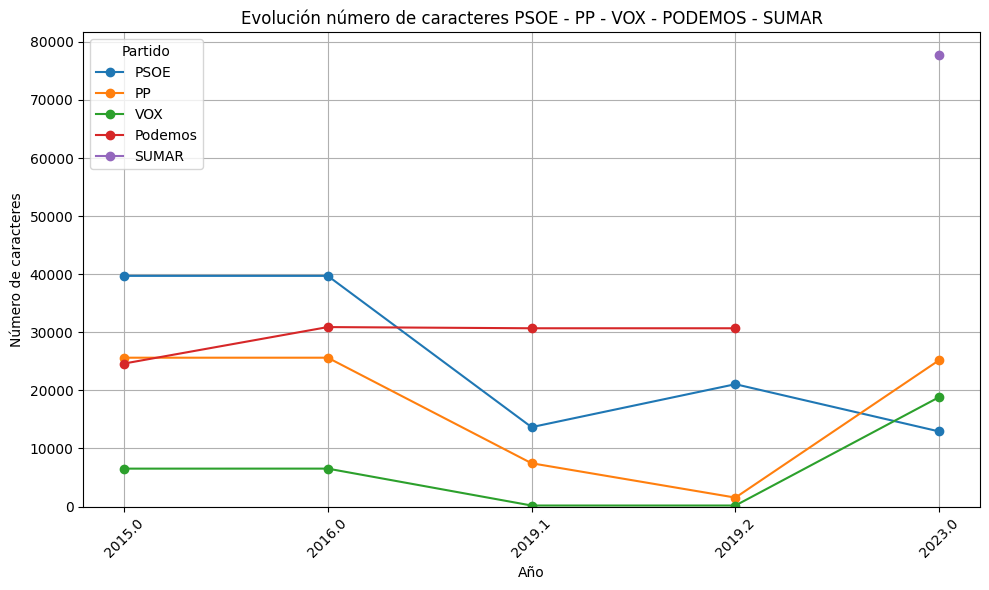

In [72]:
df_agrupado['Año'] = df_agrupado['Año'].astype(float)

# 1) Escogemos solo los partidos que nos interesan y desde 2015
parties = ['PSOE','PP','VOX','Podemos','SUMAR']
df_sel = df_agrupado[
    (df_agrupado['Partido'].isin(parties)) &
    (df_agrupado['Año'] >= 2015.0)        # ahora 'Año' es float de nuevo
].copy()

# 2) Creamos una etiqueta de año que distinga 2019.1 y 2019.2
df_sel['Año_label'] = df_sel['Año'].astype(str)

# 3) Pivotamos para tener en columnas cada partido y en índice cada año_label
pivot = df_sel.pivot_table(
    index='Año_label',
    columns='Partido',
    values='Longitud palabras',
    aggfunc='mean'
)

# 4) Ordenamos el índice numéricamente y lo volvemos a string
pivot.index = pivot.index.astype(float)
pivot = pivot.sort_index()
pivot.index = pivot.index.astype(str)

# 5) Preparamos posiciones equidistantes para el eje X
x = list(range(len(pivot)))

# 6) Dibujamos cada partido en la misma figura
plt.figure(figsize=(10,6))
for party in parties:
    if party in pivot:
        plt.plot(x, pivot[party].values, marker='o', label=party)

# 7) Ajustes finales: ticks, leyenda, límites
plt.xticks(x, pivot.index, rotation=45)
plt.xlabel('Año')
plt.ylabel('Número de caracteres')
plt.title('Evolución número de caracteres PSOE - PP - VOX - PODEMOS - SUMAR')
plt.legend(title='Partido')
plt.grid(True)
plt.ylim(0, pivot.max().max() * 1.05)
plt.tight_layout()
plt.show()

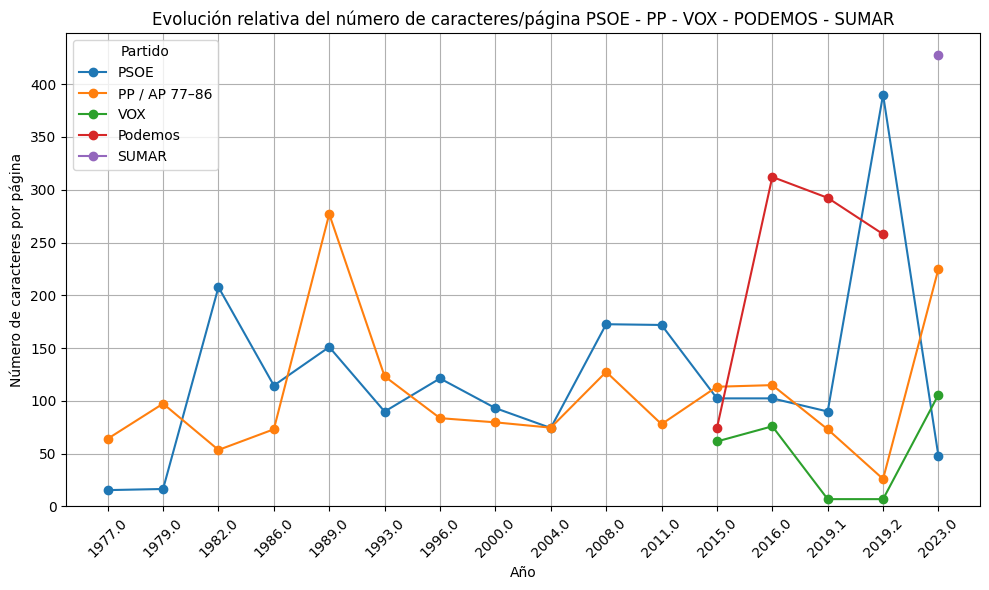

In [73]:
# 1) Asegurarnos de tener etiqueta string de año
df_agrupado['Año_label'] = df_agrupado['Año'].astype(str)

# 2) Filtrar los partidos de interés y desde 1977 si quieres incluir AP
parties = ['PSOE','PP','Alianza Popular','VOX','Podemos','SUMAR']
df_sel = df_agrupado[df_agrupado['Partido'].isin(parties)].copy()

# 3) Calcular media de caracteres/página por Año_label y Partido
pivot = (
    df_sel
      .pivot_table(
         index='Año_label',
         columns='Partido',
         values='Nº caracteres/página',
         aggfunc='mean'
      )
)

# 4) Ordenar cronológicamente según valor numérico del año_label
pivot.index = pivot.index.astype(float)
pivot = pivot.sort_index()
pivot.index = pivot.index.astype(str)

# 5) Unir “PP” y “Alianza Popular” en una sola serie si lo deseas
pivot['PP / AP 77–86'] = pivot.get('PP', pd.Series())\
                           .fillna(0) + pivot.get('Alianza Popular', pd.Series()).fillna(0)
pivot = pivot.drop(columns=['Alianza Popular'], errors='ignore')

# 6) Seleccionar las series finales a dibujar
to_plot = ['PSOE','PP / AP 77–86','VOX','Podemos','SUMAR']

# 7) Crear posiciones equidistantes para el eje X
x = list(range(len(pivot)))

# 8) Graficar todas las series
plt.figure(figsize=(10,6))
for party in to_plot:
    if party in pivot:
        plt.plot(x, pivot[party].values, marker='o', label=party)

# 9) Ajustes de ejes y etiquetas
plt.xticks(x, pivot.index, rotation=45)
plt.xlabel('Año')
plt.ylabel('Número de caracteres por página')
plt.title('Evolución relativa del número de caracteres/página PSOE - PP - VOX - PODEMOS - SUMAR')
plt.legend(title='Partido')
plt.grid(True)
plt.ylim(0, pivot[to_plot].stack().max() * 1.05)
plt.tight_layout()
plt.show()

ESTUDIO CORRELACIÓN ENTRE LA IDEOLOGÍA DE LOS PARTIDOS POLÍTICOS Y LA LONGITUD DE LA CUESTIÓN MEDIOAMBIENTAL EN SUS PROGRAMAS ELECTORALES

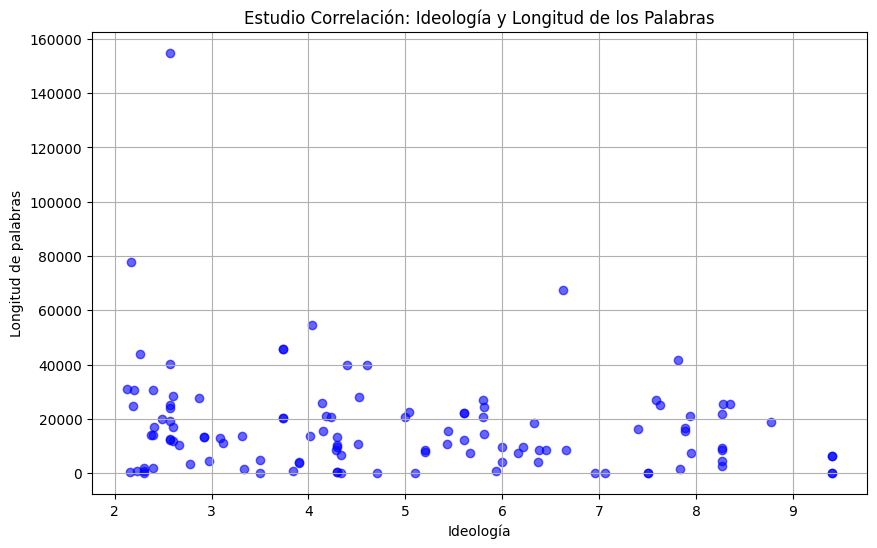

In [74]:
# Asegurarse de que los datos están correctamente cargados
df_agrupado['Ideología'] = df_agrupado['Ideología'].astype(float)  # Asegurarse de que Ideología sea numérica

# Ordenar por ideología de menor a mayor
df_agrupado_sorted = df_agrupado.sort_values(by='Ideología')

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.scatter(df_agrupado_sorted['Ideología'], df_agrupado_sorted['Longitud palabras'], color='b', alpha=0.6)

# Añadir etiquetas y título
plt.xlabel('Ideología')
plt.ylabel('Longitud de palabras')
plt.title('Estudio Correlación: Ideología y Longitud de los Palabras')

# Mostrar el gráfico
plt.grid(True)
plt.show()

In [75]:
from scipy.stats import pearsonr


ideol = df_agrupado['Ideología'].astype(float)
long = df_agrupado['Longitud palabras'].astype(float)

# 2) Cálculo con scipy
r, p_value = pearsonr(ideol, long)
r2 = r**2

print(f"Coeficiente de Pearson (r): {r:.3f}")

Coeficiente de Pearson (r): -0.182


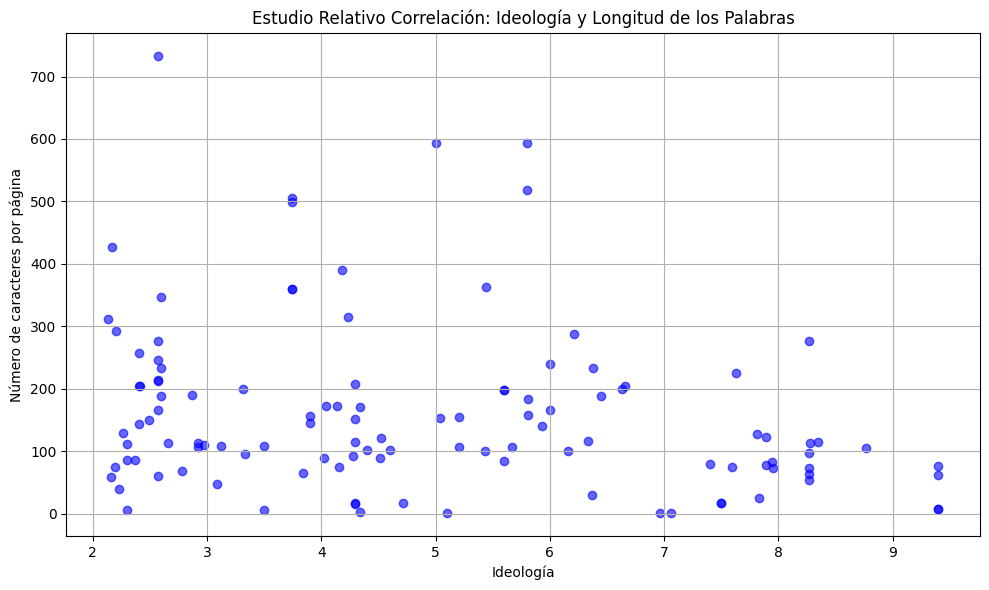

In [76]:
# Asegurarnos de que las columnas tienen el tipo adecuado
df_agrupado['Ideología'] = df_agrupado['Ideología'].astype(float)
df_agrupado['Nº caracteres/página'] = df_agrupado['Nº caracteres/página'].astype(float)

# Ordenar por ideología de menor a mayor (opcional para el scatter)
df_sorted = df_agrupado.sort_values(by='Ideología')

# Crear el scatter plot usando Nº caracteres/página en el eje Y
plt.figure(figsize=(10, 6))
plt.scatter(
    df_sorted['Ideología'],
    df_sorted['Nº caracteres/página'],
    color='b',
    alpha=0.6
)

plt.xlabel('Ideología')
plt.ylabel('Número de caracteres por página')
plt.title('Estudio Relativo Correlación: Ideología y Longitud de los Palabras')
plt.grid(True)
plt.tight_layout()
plt.show()

In [77]:
ideol = df_agrupado['Ideología'].astype(float)
long = df_agrupado['Nº caracteres/página'].astype(float)

# 2) Cálculo con scipy
r, p_value = pearsonr(ideol, long)
r2 = r**2

print(f"Coeficiente de Pearson (r): {r:.3f}")

Coeficiente de Pearson (r): -0.238


ESTUDIO CORRELACIÓN ENTRE EL % DE ESCAÑOS OBTENIDOS POR LOS PARTIDOS POLÍTICOS Y LA LONGITUD DE LA CUESTIÓN MEDIOAMBIENTAL EN SUS PROGRAMAS ELECTORALES

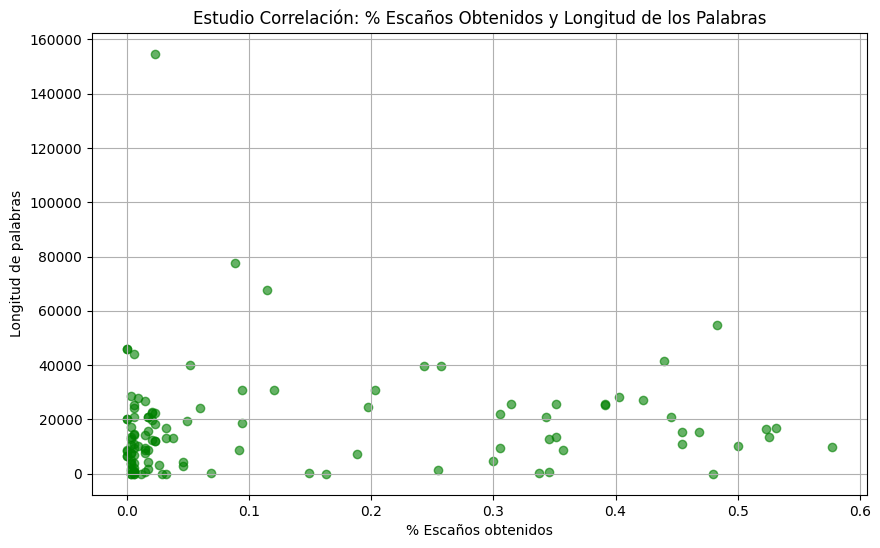

In [78]:
plt.figure(figsize=(10, 6))
plt.scatter(df_agrupado['% Escaños obtenidos'], df_agrupado['Longitud palabras'], color='g', alpha=0.6)
plt.xlabel('% Escaños obtenidos')
plt.ylabel('Longitud de palabras')
plt.title('Estudio Correlación: % Escaños Obtenidos y Longitud de los Palabras')
plt.grid(True)
plt.show()

In [79]:
ideol = df_agrupado['% Escaños obtenidos'].astype(float)
long = df_agrupado['Longitud palabras'].astype(float)

# 2) Cálculo con scipy
r, p_value = pearsonr(ideol, long)
r2 = r**2

print(f"Coeficiente de Pearson (r): {r:.3f}")

Coeficiente de Pearson (r): 0.082


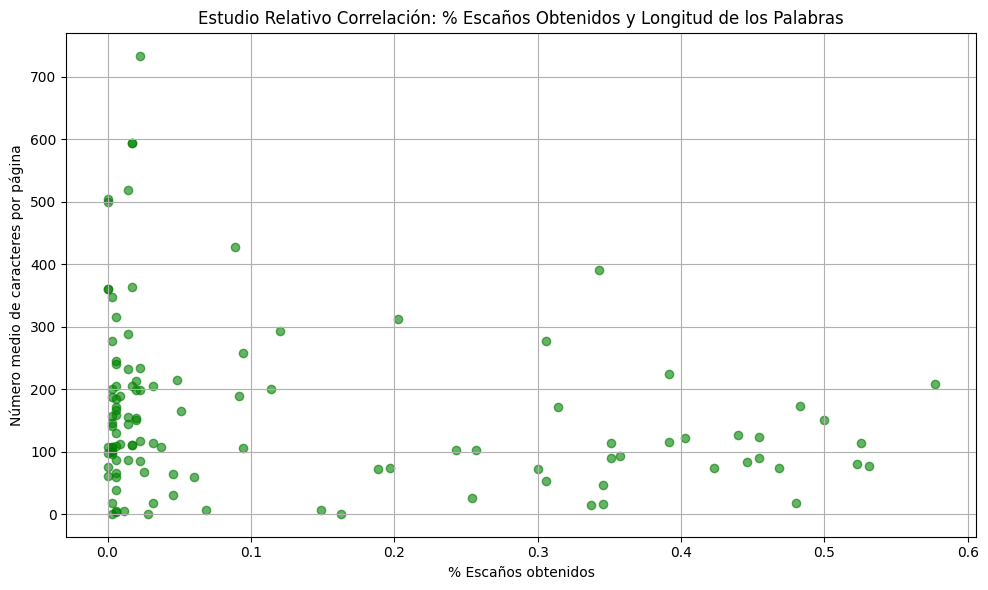

In [80]:
df_agrupado['% Escaños obtenidos'] = df_agrupado['% Escaños obtenidos'].astype(float)
df_agrupado['Nº caracteres/página']    = df_agrupado['Nº caracteres/página'].astype(float)

# Dibujar scatter: % escaños vs nº medio de caracteres por página
plt.figure(figsize=(10, 6))
plt.scatter(
    df_agrupado['% Escaños obtenidos'],
    df_agrupado['Nº caracteres/página'],
    color='g',
    alpha=0.6
)
plt.xlabel('% Escaños obtenidos')
plt.ylabel('Número medio de caracteres por página')
plt.title('Estudio Relativo Correlación: % Escaños Obtenidos y Longitud de los Palabras')
plt.grid(True)
plt.tight_layout()
plt.show()

In [81]:
# 1) Asegúrate de tener las dos columnas numéricas
ideol = df_agrupado['% Escaños obtenidos'].astype(float)
long = df_agrupado['Nº caracteres/página'].astype(float)

# 2) Cálculo con scipy
r, p_value = pearsonr(ideol, long)
r2 = r**2

print(f"Coeficiente de Pearson (r): {r:.3f}")

Coeficiente de Pearson (r): -0.204


DISTRIBUCIÓN DE LA LONGITUD DE LA CUESTIÓN MEDIOAMBIENTAL EN LOS PROGRAMAS ELECTORALES DE LOS PARTIDOS POLÍTICOS

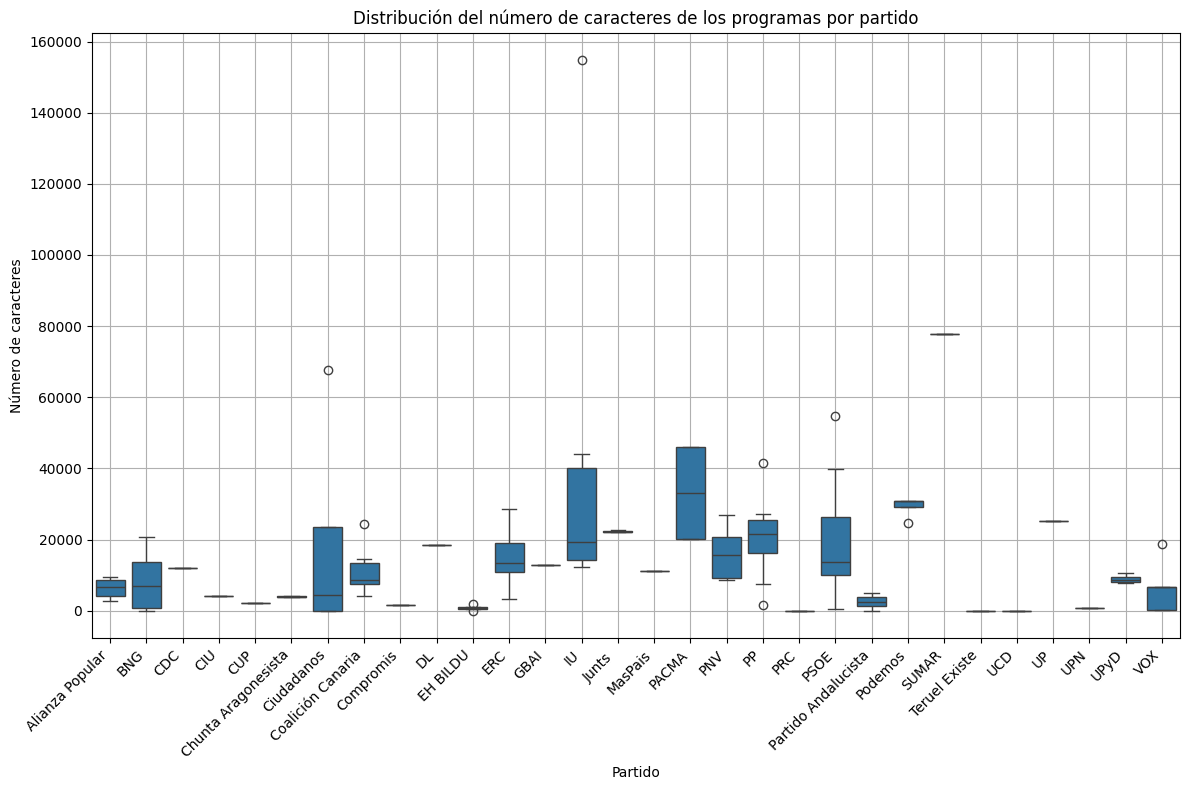

In [82]:
import seaborn as sns

# Crear el gráfico Box Plot
plt.figure(figsize=(12, 8))  # Ajustamos el tamaño de la figura para que haya más espacio
sns.boxplot(x='Partido', y='Longitud palabras', data=df_agrupado)

# Rotar las etiquetas del eje X para evitar que se sobrepongan
plt.xticks(rotation=45, ha='right')  # Rotamos las etiquetas en el eje X y las alineamos a la derecha

# Título y etiquetas de los ejes
plt.title('Distribución del número de caracteres de los programas por partido')
plt.xlabel('Partido')
plt.ylabel('Número de caracteres')

# Mostrar la cuadrícula
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()  # Esto asegura que no haya solapamiento
plt.show()

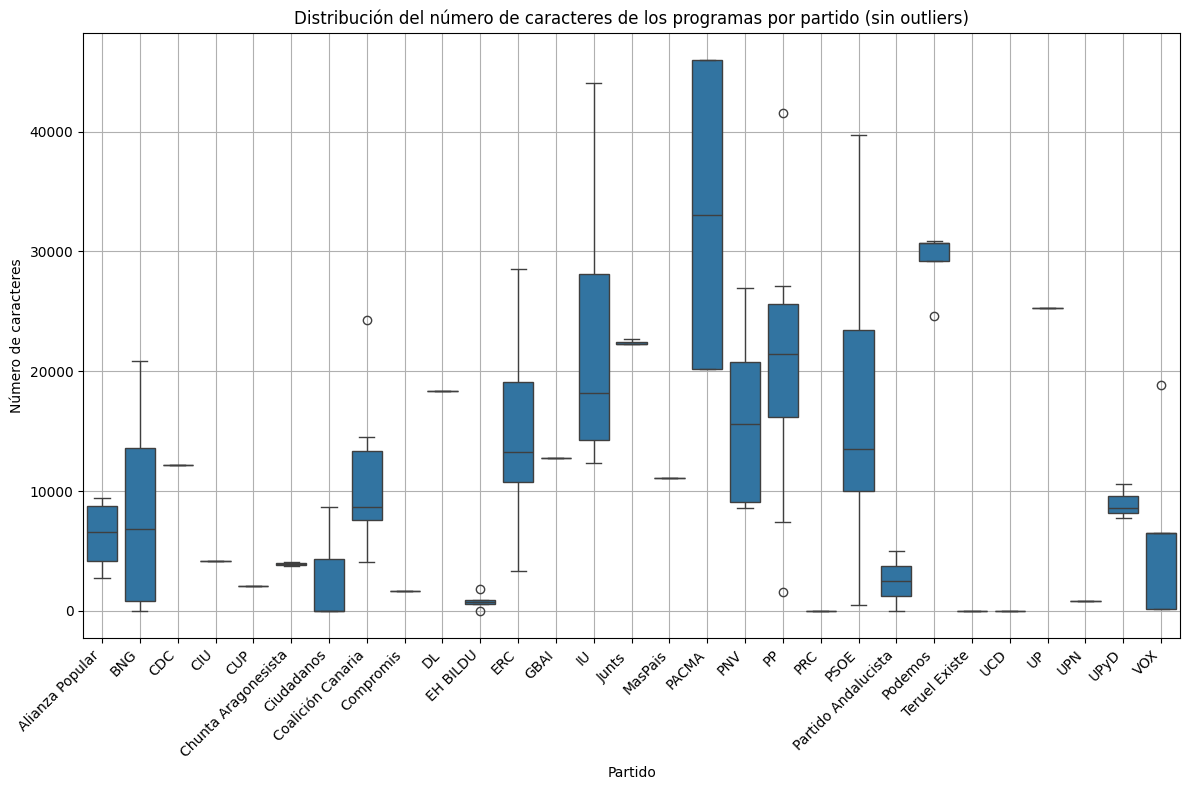

In [83]:

# Calcular el IQR para detectar outliers
Q1 = df_agrupado['Longitud palabras'].quantile(0.25)
Q3 = df_agrupado['Longitud palabras'].quantile(0.75)
IQR = Q3 - Q1

# Filtrar los valores que están fuera del rango permitido
df_sin_outliers = df_agrupado[(df_agrupado['Longitud palabras'] >= (Q1 - 1.5 * IQR)) &
                              (df_agrupado['Longitud palabras'] <= (Q3 + 1.5 * IQR))]

# Crear el gráfico Box Plot sin outliers
plt.figure(figsize=(12, 8))
sns.boxplot(x='Partido', y='Longitud palabras', data=df_sin_outliers)

# Rotar las etiquetas del eje X para evitar que se sobrepongan
plt.xticks(rotation=45, ha='right')

# Título y etiquetas de los ejes
plt.title('Distribución del número de caracteres de los programas por partido (sin outliers)')
plt.xlabel('Partido')
plt.ylabel('Número de caracteres')

# Mostrar la cuadrícula
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

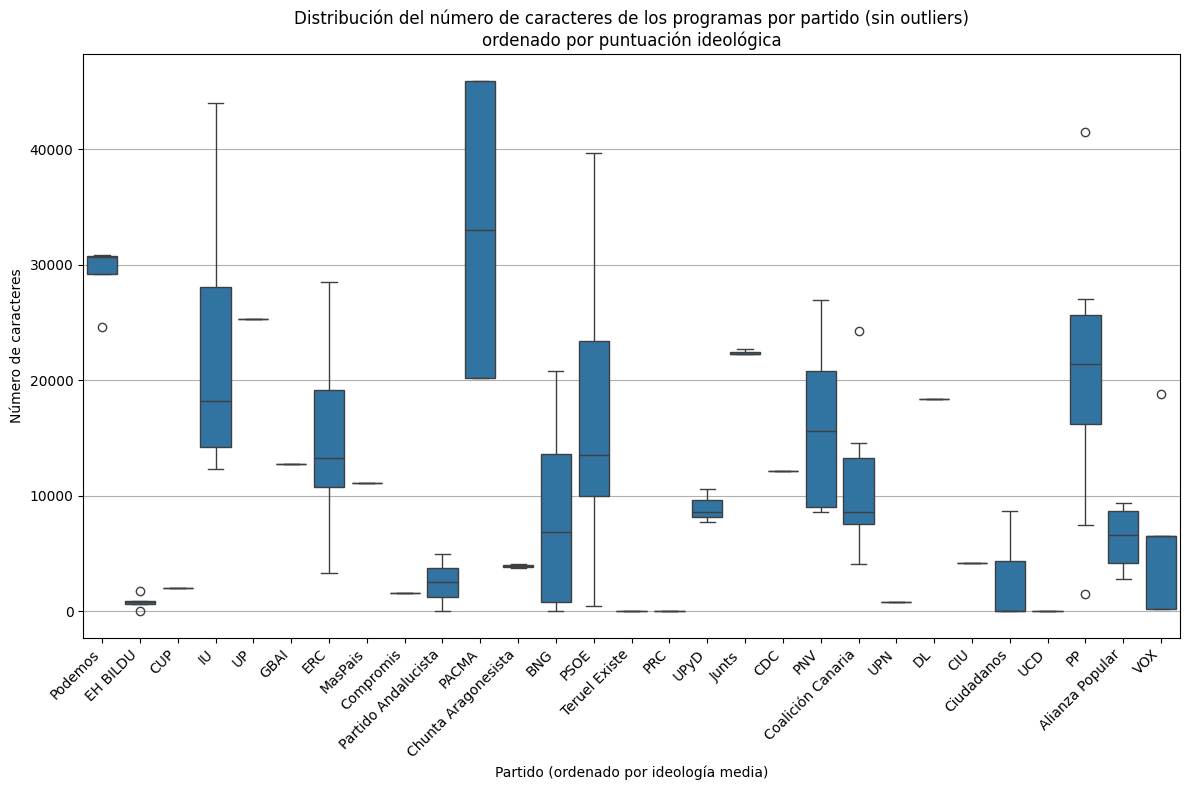

In [84]:
# 1) Calcular la media de ideología por partido (sobre el DataFrame sin outliers)
ideol_media = (
    df_sin_outliers
      .groupby('Partido')['Ideología']
      .mean()
      .sort_values()        # de menor a mayor
)

# 2) Lista de partidos ordenada
order_partidos = ideol_media.index.tolist()

# 3) Crear el boxplot indicando ese orden
plt.figure(figsize=(12, 8))
sns.boxplot(
    x='Partido',
    y='Longitud palabras',
    data=df_sin_outliers,
    order=order_partidos    # <— aquí le pasas tu orden personalizado
)

# Rotar etiquetas y ajustar
plt.xticks(rotation=45, ha='right')
plt.title('Distribución del número de caracteres de los programas por partido (sin outliers)\nordenado por puntuación ideológica')
plt.xlabel('Partido (ordenado por ideología media)')
plt.ylabel('Número de caracteres')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

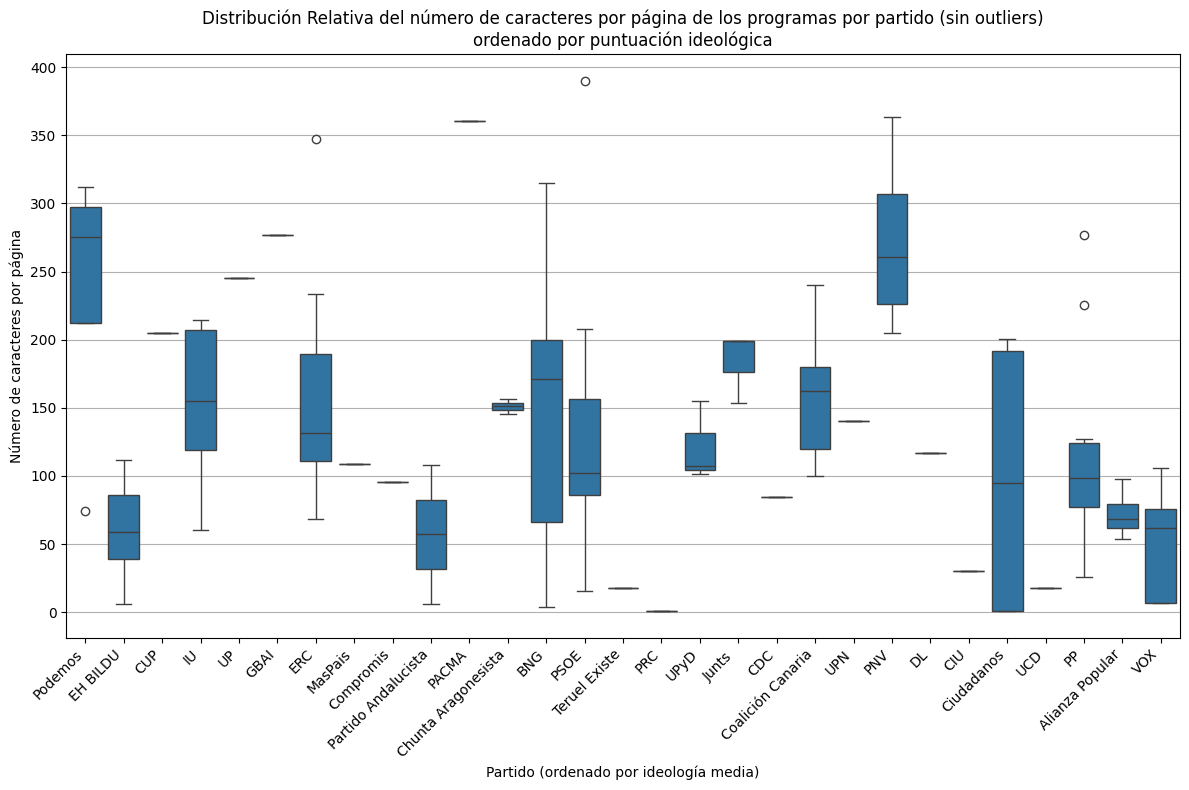

In [85]:
# 1) Detectar outliers sobre Nº caracteres/página usando IQR
Q1 = df_agrupado['Nº caracteres/página'].quantile(0.25)
Q3 = df_agrupado['Nº caracteres/página'].quantile(0.75)
IQR = Q3 - Q1

df_sin_outliers_cp = df_agrupado[
    (df_agrupado['Nº caracteres/página'] >= (Q1 - 1.5 * IQR)) &
    (df_agrupado['Nº caracteres/página'] <= (Q3 + 1.5 * IQR))
]

# 2) Media de ideología por partido (sin outliers)
ideol_media = (
    df_sin_outliers_cp
      .groupby('Partido')['Ideología']
      .mean()
      .sort_values()
)
order_partidos = ideol_media.index.tolist()

# 3) Boxplot de Nº caracteres/página ordenado por ideología media
plt.figure(figsize=(12, 8))
sns.boxplot(
    x='Partido',
    y='Nº caracteres/página',
    data=df_sin_outliers_cp,
    order=order_partidos
)

plt.xticks(rotation=45, ha='right')
plt.title('Distribución Relativa del número de caracteres por página de los programas por partido (sin outliers)\nordenado por puntuación ideológica')
plt.xlabel('Partido (ordenado por ideología media)')
plt.ylabel('Número de caracteres por página')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

LONGITUD MEDIA DE LA CUESTIÓN MEDIOAMBIENTAL EN LOS PROGRAMAS ELECTORALES DE LOS PARTIDOS POLÍTICOS

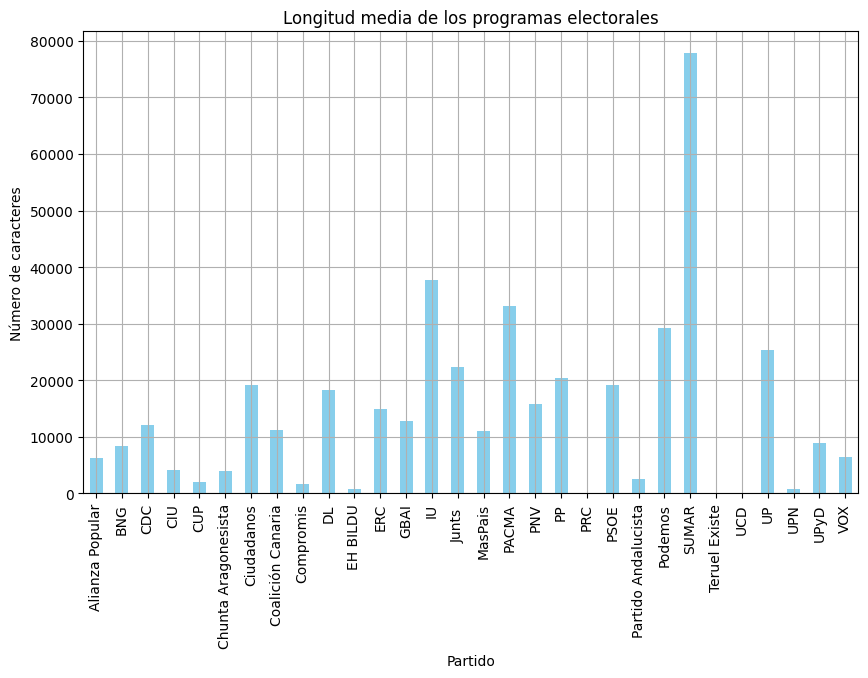

In [86]:
#Hacemos un gráfico de barras para ver la longitud media de los programas#
df_media_caracteres_partido = df_agrupado.groupby('Partido')['Longitud palabras'].mean()
plt.figure(figsize=(10, 6))
df_media_caracteres_partido.plot(kind='bar', color='skyblue')
plt.title('Longitud media de los programas electorales')
plt.xlabel('Partido')
plt.ylabel('Número de caracteres')
plt.grid(True)
plt.show()

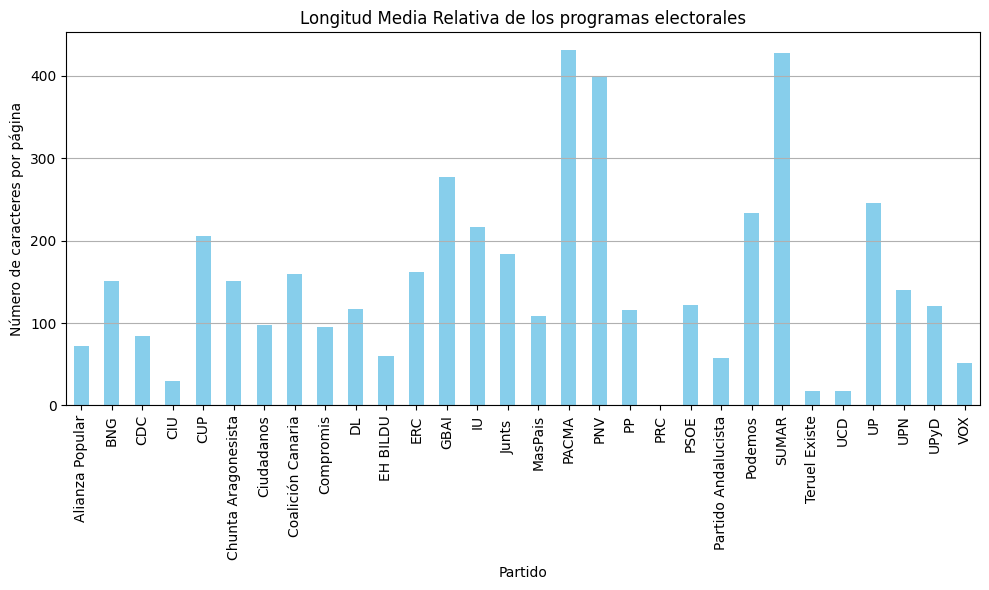

In [87]:
# 1) Asegurarnos de que la columna “Nº caracteres/página” es numérica
df_agrupado['Nº caracteres/página'] = df_agrupado['Nº caracteres/página'].astype(float)

# 2) Calcular el número medio de caracteres por página para cada partido
df_media_chars_pag = df_agrupado.groupby('Partido')['Nº caracteres/página'].mean()

# 3) Dibujar el bar‐plot
plt.figure(figsize=(10,6))
df_media_chars_pag.plot(kind='bar', color='skyblue')
plt.title('Longitud Media Relativa de los programas electorales')
plt.xlabel('Partido')
plt.ylabel('Número de caracteres por página')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

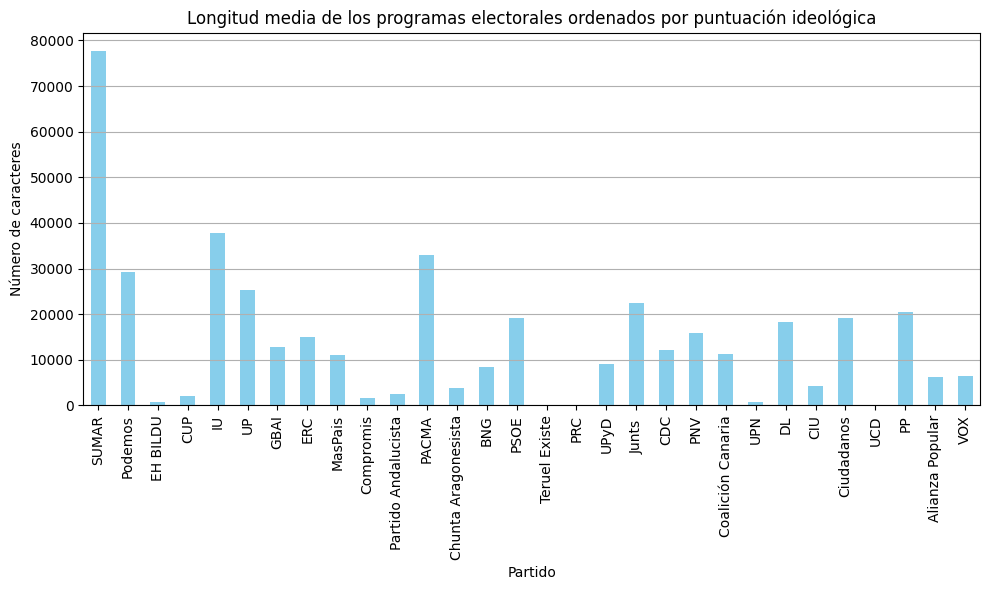

In [88]:
# Media de ideología por partido
ideol = df_agrupado.groupby('Partido')['Ideología'].mean().sort_values()

# Media de longitud reindexada según orden de ideología
long_media = df_agrupado.groupby('Partido')['Longitud palabras'].mean()
long_media = long_media.reindex(ideol.index)

# Bar-plot
plt.figure(figsize=(10,6))
long_media.plot(kind='bar', color='skyblue')
plt.title('Longitud media de los programas electorales ordenados por puntuación ideológica')
plt.xlabel('Partido')
plt.ylabel('Número de caracteres')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

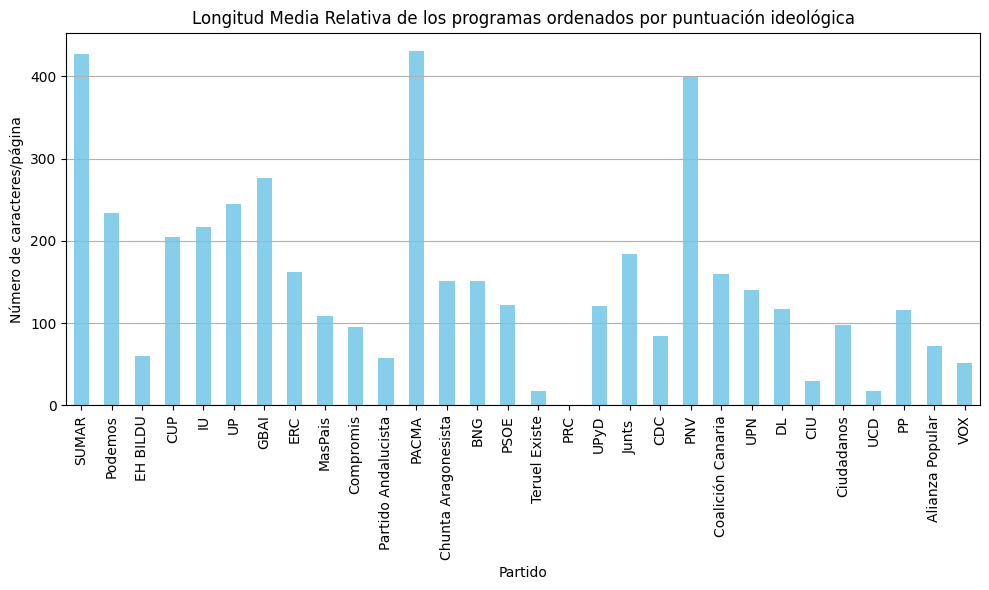

In [89]:
# 1) Media de ideología por partido
ideol = df_agrupado.groupby('Partido')['Ideología'].mean().sort_values()

# 2) Media de nº caracteres/página reindexada según ese orden
chars_pag_media = df_agrupado.groupby('Partido')['Nº caracteres/página'].mean()
chars_pag_media = chars_pag_media.reindex(ideol.index)

# 3) Bar-plot
plt.figure(figsize=(10,6))
chars_pag_media.plot(kind='bar', color='skyblue')
plt.title('Longitud Media Relativa de los programas ordenados por puntuación ideológica')
plt.xlabel('Partido')
plt.ylabel('Número de caracteres/página')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()